In [301]:
#Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


pd.plotting.register_matplotlib_converters()
%matplotlib inline


In [302]:
# Prior Data
df_recent = pd.read_csv('../data/energy_recent_clean.csv', index_col = 'date')
df_past = pd.read_csv('../data/energy_past_clean.csv', index_col = 'date')

df_recent.set_index(pd.to_datetime(df_recent.index), inplace = True)
df_past.set_index(pd.to_datetime(df_past.index), inplace = True)

In [303]:
#Predictive Data
coal_pred = pd.read_csv("../data/Predictions_Coal")
ngas_pred = pd.read_csv("../data/Predictions_Natural_Gas")
other_pred = pd.read_csv("../data/Predictions_Other_Gases")
nuclear_pred = pd.read_csv("../data/Predictions_Nuclear")
petroleum_pred = pd.read_csv("../data/Predictions_Petroleum")
hydro_pred = pd.read_csv("../data/Predictions_Hydroelectric")
wind_pred = pd.read_csv("../data/Predictions_Wind")
geo_pred = pd.read_csv("../data/Predictions_Geothermal")
solar_pred = pd.read_csv("../data/Predictions_Solar")
bio_pred = pd.read_csv("../data/Predictions_Biomass")

In [304]:
features = [
    'Coal',
    'Natural Gas', 
    'Other Gases', 
    'Nuclear',
    'Conventional Hydroelectric Power', 
    'Wind',
    'Geo- thermal', 
    'Solar/PV', 
    'Biomass Total',
    'Petroleum', 
    'Renewable Total',
    'Nonrenewable Total', 
    'Total', 
    'Renewable Percentage',
    'Nonrenewable Percentage'
]

In [305]:
df_recent[features].head()

Coal  Natural Gas  Other Gases  Nuclear  \
date                                                      
2001-01-01  177287.0      42389.0        718.0  68707.0   
2001-02-01  149735.0      37967.0        676.0  61272.0   
2001-03-01  155269.0      44364.0        769.0  62141.0   
2001-04-01  140671.0      45843.0        698.0  56003.0   
2001-05-01  151593.0      50934.0        785.0  61512.0   

            Conventional Hydroelectric Power   Wind  Geo- thermal  Solar/PV  \
date                                                                          
2001-01-01                           18852.0  389.0        1229.0       0.0   
2001-02-01                           17473.0  431.0        1073.0       0.0   
2001-03-01                           20477.0  532.0        1190.0       0.0   
2001-04-01                           18013.0  685.0        1095.0       0.0   
2001-05-01                           19176.0  635.0        1071.0       0.0   

            Biomass Total  Petroleum  Renewable Total  Nonrenewable Total  \
date                                                                        
2001-01-01         4400.0    18112.0          24870.0            307213.0   
2001-02-01         3793.0    10342.0          22770.0            259992.0   
2001-03-01         4042.0    11733.0          26241.0            274276.0   
2001-04-01         4008.0    10864.0          23801.0            254079.0   
2001-05-01         3951.0    10390.0          24833.0            275214.0   

               Total  Renewable Percentage  Nonrenewable Percentage  
date                                                                 
2001-01-01  333075.0              0.074668                 0.922354  
2001-02-01  283634.0              0.080280                 0.916646  
2001-03-01  301448.0              0.087050                 0.909862  
2001-04-01  278837.0              0.085358                 0.911210  
2001-05-01  301033.0              0.082493                 0.914232

In [306]:
#Put each object in a tuple with its name so I can loop through them
preds = [(coal_pred, 'coal'),
         (ngas_pred, 'ngas'), 
         (other_pred, 'other'), 
         (nuclear_pred, 'nuclear'), 
         (hydro_pred, 'hydro'), 
         (wind_pred, 'wind'), 
         (geo_pred, 'geo'), 
         (solar_pred, 'solar'), 
         (bio_pred, 'bio'), 
         (petroleum_pred, 'petroleum')]

In [307]:
preds[0][0].shape

(592, 18)

In [308]:
preds[0][0].tail()

Unnamed: 0          ds          trend  cap     yhat_lower    yhat_upper  \
587         587  2049-11-30 -127985.922746  100 -350224.306190  72371.658861   
588         588  2049-12-31 -128585.661490  100 -374442.946677  78864.441941   
589         589  2050-01-31 -129185.400233  100 -339026.033706  65801.994483   
590         590  2050-02-28 -129727.099744  100 -345935.223068  72231.470606   
591         591  2050-03-31 -130326.838487  100 -288633.462203  59276.343481   

       trend_lower   trend_upper  multiplicative_terms  \
587 -346120.560473  68876.284851              0.009454   
588 -347456.984203  68974.702886              0.073109   
589 -349212.729987  69159.104975             -0.034016   
590 -349641.166909  69325.661700             -0.016742   
591 -350958.861849  69510.063788             -0.182148   

     multiplicative_terms_lower  multiplicative_terms_upper    yearly  \
587                    0.009454                    0.009454  0.009454   
588                    0.073109                    0.073109  0.073109   
589                   -0.034016                   -0.034016 -0.034016   
590                   -0.016742                   -0.016742 -0.016742   
591                   -0.182148                   -0.182148 -0.182148   

     yearly_lower  yearly_upper  additive_terms  additive_terms_lower  \
587      0.009454      0.009454             0.0                   0.0   
588      0.073109      0.073109             0.0                   0.0   
589     -0.034016     -0.034016             0.0                   0.0   
590     -0.016742     -0.016742             0.0                   0.0   
591     -0.182148     -0.182148             0.0                   0.0   

     additive_terms_upper           yhat  
587                   0.0 -129195.947661  
588                   0.0 -137986.373485  
589                   0.0 -124791.080745  
590                   0.0 -127555.261317  
591                   0.0 -106588.047408

In [309]:
#Empty DataFrame of correct sizes
pred_lower = pd.DataFrame(index = pd.to_datetime(preds[0][0]['ds']))
pred_upper = pd.DataFrame(index = pd.to_datetime(preds[0][0]['ds']))
pred_mid = pd.DataFrame(index = pd.to_datetime(preds[0][0]['ds']))

In [310]:
pred_lower.shape

(592, 0)

In [311]:
pred_mid.shape

(592, 0)

In [312]:
pred_upper.shape

(592, 0)

In [313]:
#Fill DataFrames in with the correct predictions
for pred, name in preds:
    pred_lower[f'{name}'] = list(pred['yhat_lower'])
    pred_mid[f'{name}'] = list(pred['yhat'])
    pred_upper[f'{name}'] = list(pred['yhat_upper'])

In [314]:
pred_lower.head()

coal          ngas       other       nuclear  \
ds                                                                  
2001-01-01  162564.706108  36310.647367  695.455287  68483.776473   
2001-02-01  139827.058951  31215.362061  635.998206  58761.318008   
2001-03-01  136562.316334  35436.149937  757.562427  59773.673185   
2001-04-01  122219.961734  33732.136371  728.556880  53892.586171   
2001-05-01  137085.756881  38890.740287  746.285946  59797.200709   

                   hydro        wind          geo       solar          bio  \
ds                                                                           
2001-01-01  19396.894143 -429.180644  1175.626968 -253.176546  4194.384031   
2001-02-01  17184.715557 -588.341989  1036.302091 -235.145083  3741.458108   
2001-03-01  19128.105756 -321.620193  1148.656669 -220.082739  4046.376551   
2001-04-01  19094.665871 -333.588524  1078.524750 -230.480056  3816.202256   
2001-05-01  21676.651533 -491.905944  1121.176239 -230.044762  3942.369664   

               petroleum  
ds                        
2001-01-01  12505.352668  
2001-02-01   8255.179848  
2001-03-01   8636.745464  
2001-04-01   7851.011798  
2001-05-01   7817.749888

In [315]:
pred_mid.head()

coal          ngas       other       nuclear  \
ds                                                                  
2001-01-01  174042.011175  44483.564855  823.251575  70399.396255   
2001-02-01  150330.544240  39495.543292  761.170483  60755.894096   
2001-03-01  147655.673411  43842.262644  880.888217  62020.311632   
2001-04-01  134067.234696  42299.483978  848.908503  55837.384223   
2001-05-01  147482.723118  46878.597359  875.183172  61866.275371   

                   hydro        wind          geo      solar          bio  \
ds                                                                          
2001-01-01  22418.459983  844.292784  1222.169092  14.654761  4337.558852   
2001-02-01  20078.880804  793.023183  1086.037597  17.383624  3884.460604   
2001-03-01  21839.778252  977.037369  1197.861512  25.568231  4184.048146   
2001-04-01  21946.127587  988.357461  1127.617630  29.039693  3945.580034   
2001-05-01  24506.493759  912.756438  1171.857187  33.592916  4088.191856   

               petroleum  
ds                        
2001-01-01  14493.017665  
2001-02-01  10306.142815  
2001-03-01  10549.352475  
2001-04-01   9665.162274  
2001-05-01   9776.523949

In [316]:
pred_upper.head()

coal          ngas        other       nuclear  \
ds                                                                   
2001-01-01  184425.307005  52678.109465   956.775932  72524.918703   
2001-02-01  161090.570727  47451.761672   894.347042  62761.324060   
2001-03-01  158077.104542  52343.855550  1007.034842  64028.508763   
2001-04-01  144016.930105  51369.944482   970.983360  57870.282713   
2001-05-01  158472.321317  55247.623172  1001.870782  64028.570585   

                   hydro         wind          geo       solar          bio  \
ds                                                                            
2001-01-01  25315.876150  2207.692073  1271.962320  258.672563  4476.394546   
2001-02-01  23270.804412  2230.983027  1133.005324  285.389650  4017.811042   
2001-03-01  24761.315389  2428.341784  1247.490344  290.114048  4332.770121   
2001-04-01  24809.493367  2302.358050  1177.790894  283.746705  4086.465628   
2001-05-01  27401.285756  2141.189172  1225.089031  291.703024  4230.385717   

               petroleum  
ds                        
2001-01-01  16424.364223  
2001-02-01  12333.900916  
2001-03-01  12435.426876  
2001-04-01  11565.307573  
2001-05-01  11721.148927

In [317]:
#Applying the relu function to each to remove any negative predictions
pred_upper = pred_upper.applymap(lambda x: np.maximum(0,x))
pred_lower = pred_lower.applymap(lambda x: np.maximum(0,x))
pred_mid = pred_mid.applymap(lambda x: np.maximum(0,x))

In [318]:
pred_upper['solar'].describe()

count       592.000000
mean      62748.706927
std       70645.095807
min         258.672563
25%        1778.880243
50%       26369.057526
75%      117382.836766
max      239949.944967
Name: solar, dtype: float64

In [319]:
pred_mid['solar'].describe()

count       592.000000
mean      43996.979141
std       50903.708947
min          14.654761
25%        1520.692448
50%       20958.726408
75%       75589.978988
max      199658.054193
Name: solar, dtype: float64

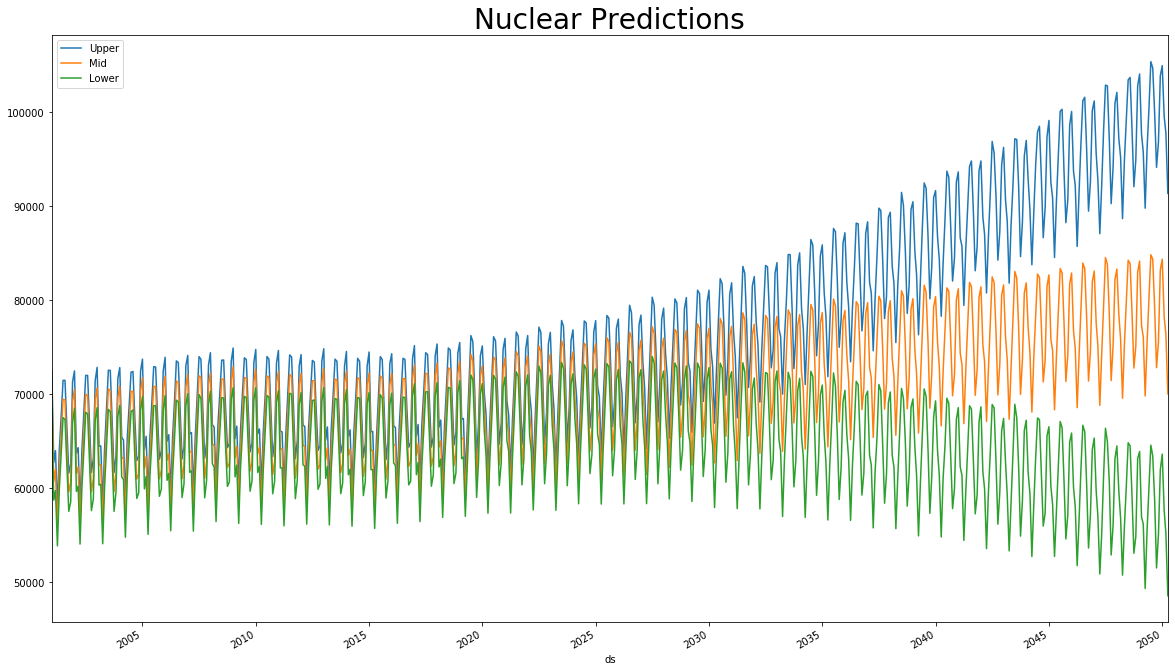

In [320]:
plt.figure(figsize = (20,12))
pred_upper['nuclear'].plot(label = 'Upper')
pred_mid['nuclear'].plot(label = 'Mid')
pred_lower['nuclear'].plot(label = 'Lower')
plt.title("Nuclear Predictions", size = 28)
plt.legend()

In [321]:
nonrenewables = ['coal', 'ngas', 'other', 'nuclear', 'petroleum']
renewables = ['wind', 'solar', 'hydro', 'geo', 'bio']

#Create total terms and percentage terms for upper
pred_upper['renewables'] = pred_upper[renewables].sum(axis = 1)
pred_upper['nonrenewables'] = pred_upper[nonrenewables].sum(axis = 1)
pred_upper['total'] = pred_upper[['renewables', 'nonrenewables']].sum(axis = 1)
pred_upper['renewable percent'] = pred_upper['renewables']/pred_upper['total']
pred_upper['nonrenewable percent'] = pred_upper['nonrenewables']/pred_upper['total']

#Midrange
pred_mid['renewables'] = pred_mid[renewables].sum(axis = 1)
pred_mid['nonrenewables'] = pred_mid[nonrenewables].sum(axis = 1)
pred_mid['total'] = pred_mid[['renewables', 'nonrenewables']].sum(axis = 1)
pred_mid['renewable percent'] = pred_mid['renewables']/pred_mid['total']
pred_mid['nonrenewable percent'] = pred_mid['nonrenewables']/pred_mid['total']

#Lower
pred_lower['renewables'] = pred_lower[renewables].sum(axis = 1)
pred_lower['nonrenewables'] = pred_lower[nonrenewables].sum(axis = 1)
pred_lower['total'] = pred_lower[['renewables', 'nonrenewables']].sum(axis = 1)
pred_lower['renewable percent'] = pred_lower['renewables']/pred_lower['total']
pred_lower['nonrenewable percent'] = pred_lower['nonrenewables']/pred_lower['total']


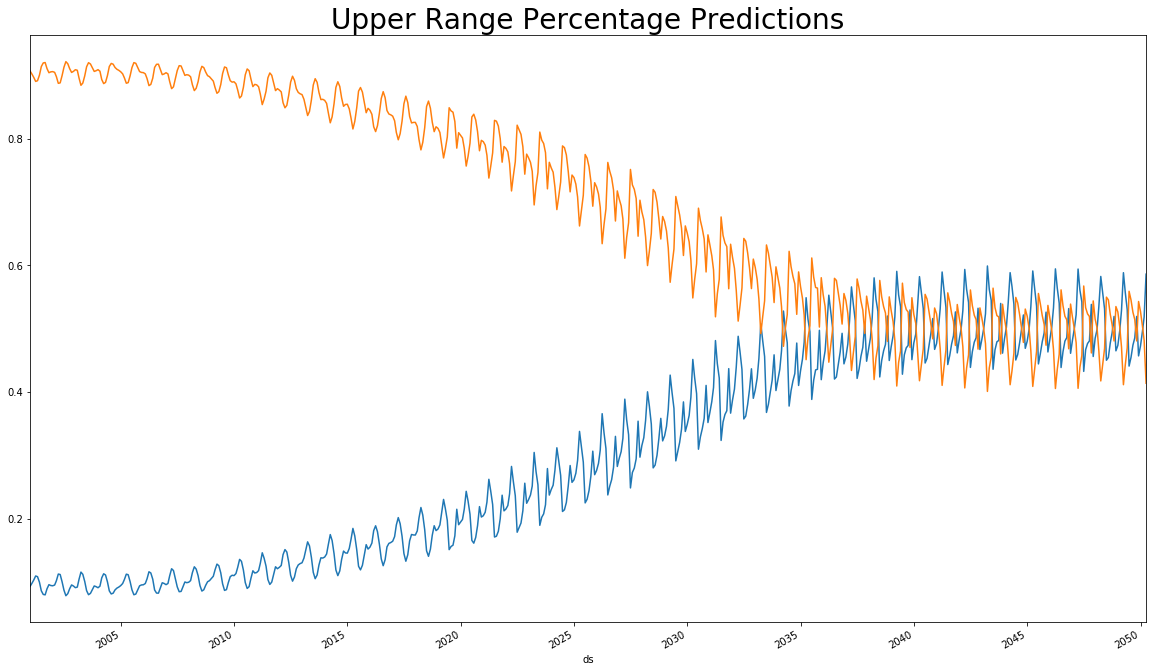

In [322]:
plt.figure(figsize = (20,12))
pred_upper['renewable percent'].plot()
pred_upper['nonrenewable percent'].plot()
plt.title("Upper Range Percentage Predictions", size = 28);

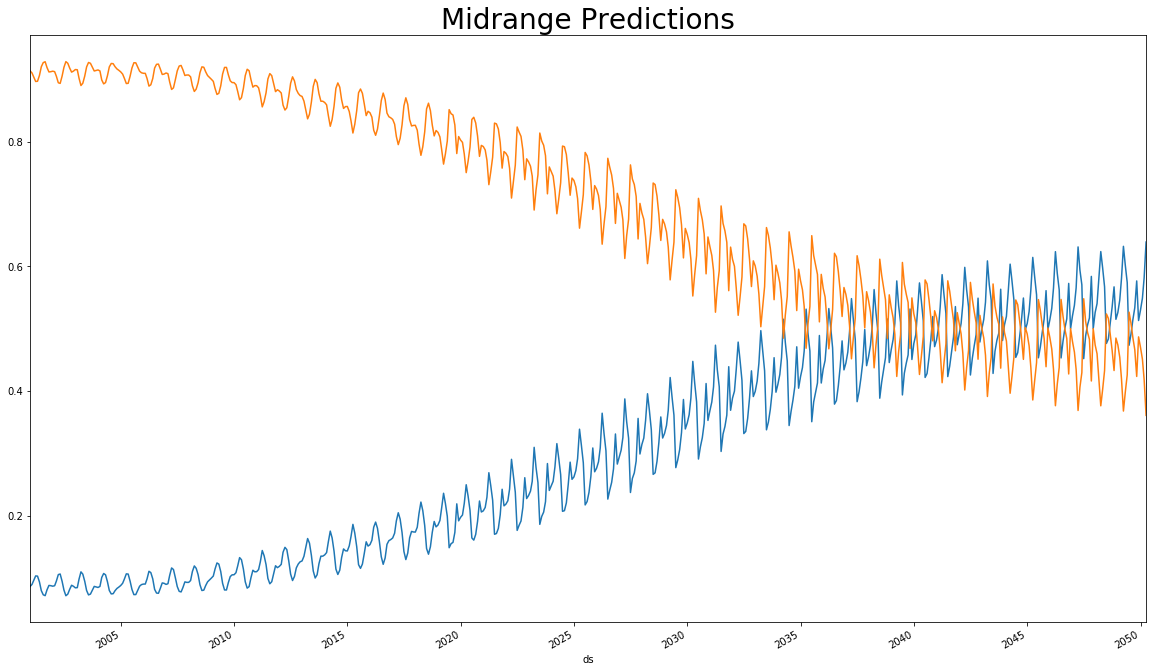

In [323]:
plt.figure(figsize = (20,12))
pred_mid['renewable percent'].plot()
pred_mid['nonrenewable percent'].plot()

plt.title("Midrange Predictions", size = 28);

Text(0.5, 1.0, 'Lower Range Predictions')

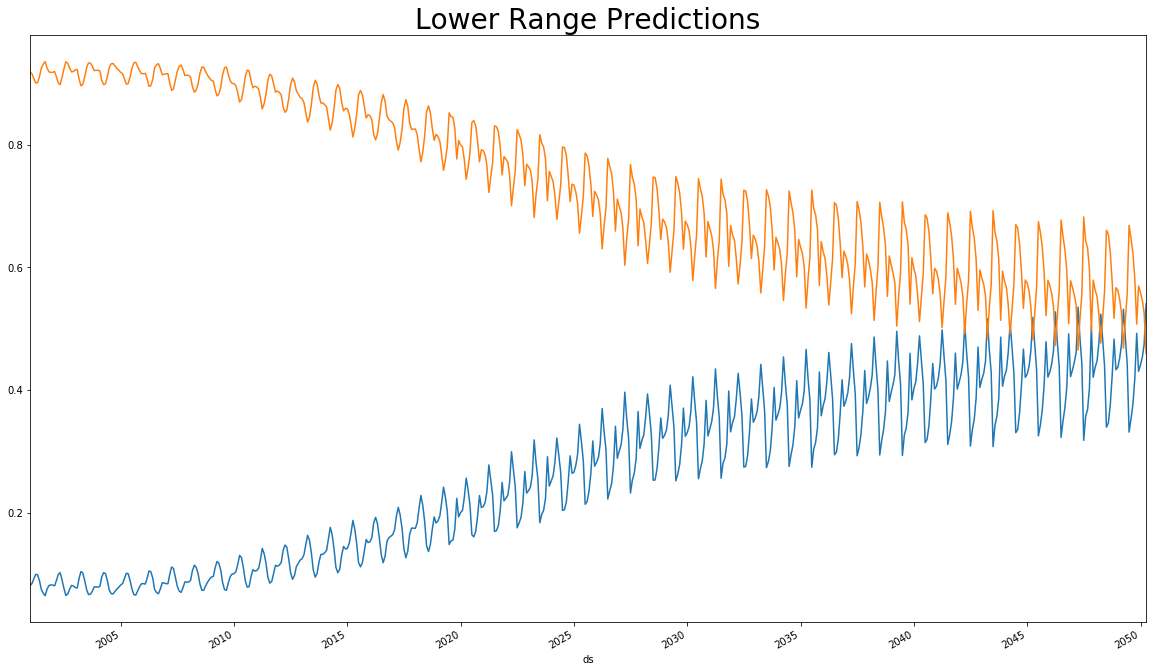

In [324]:
plt.figure(figsize = (20,12))
pred_lower['renewable percent'].plot()
pred_lower['nonrenewable percent'].plot()

plt.title("Lower Range Predictions", size = 28)

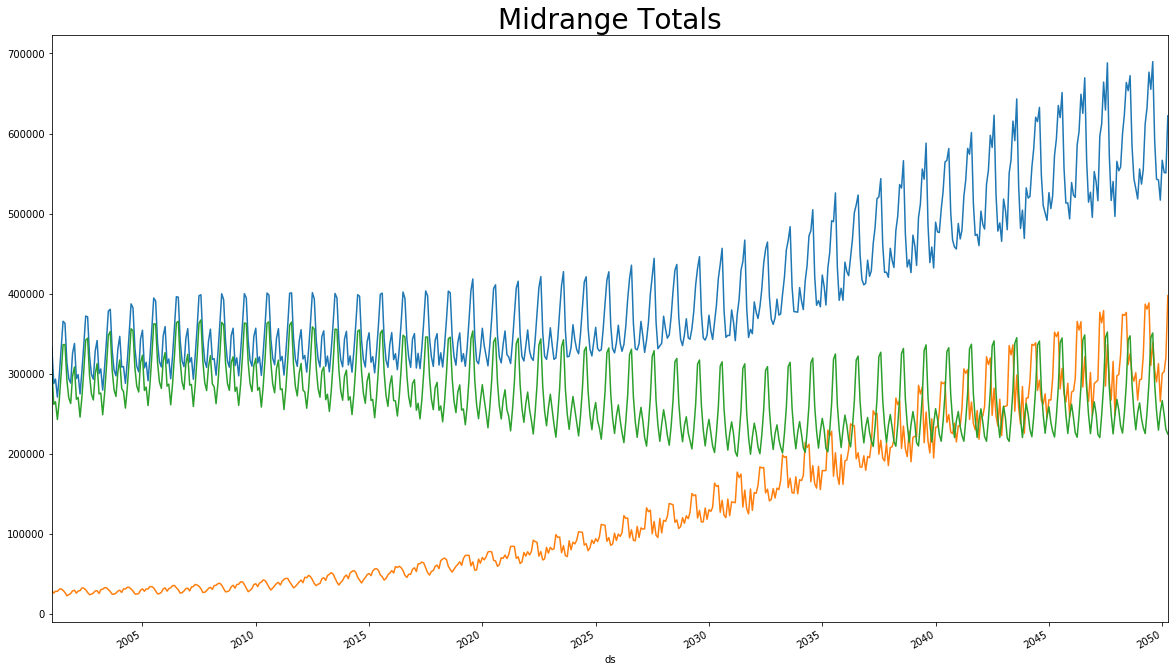

In [325]:
plt.figure(figsize = (20,12))
pred_mid['total'].plot()
pred_mid['renewables'].plot()
pred_mid['nonrenewables'].plot()
plt.title("Midrange Totals", size = 28);

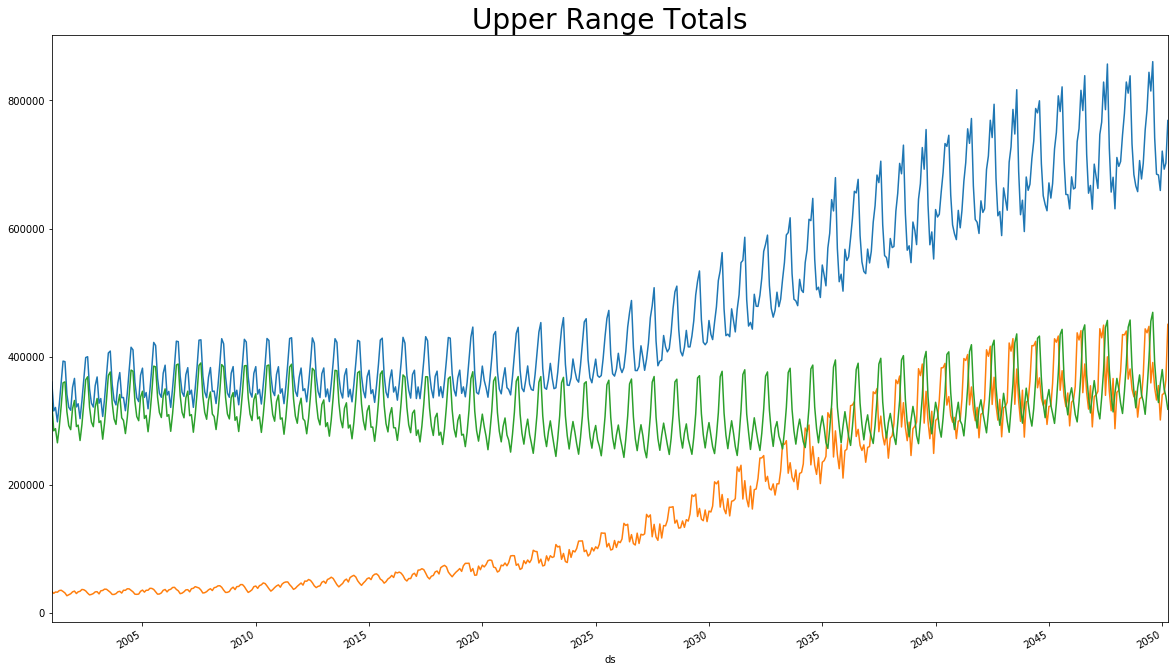

In [326]:
plt.figure(figsize = (20,12))
pred_upper['total'].plot()
pred_upper['renewables'].plot()
pred_upper['nonrenewables'].plot()

plt.title("Upper Range Totals", size = 28);

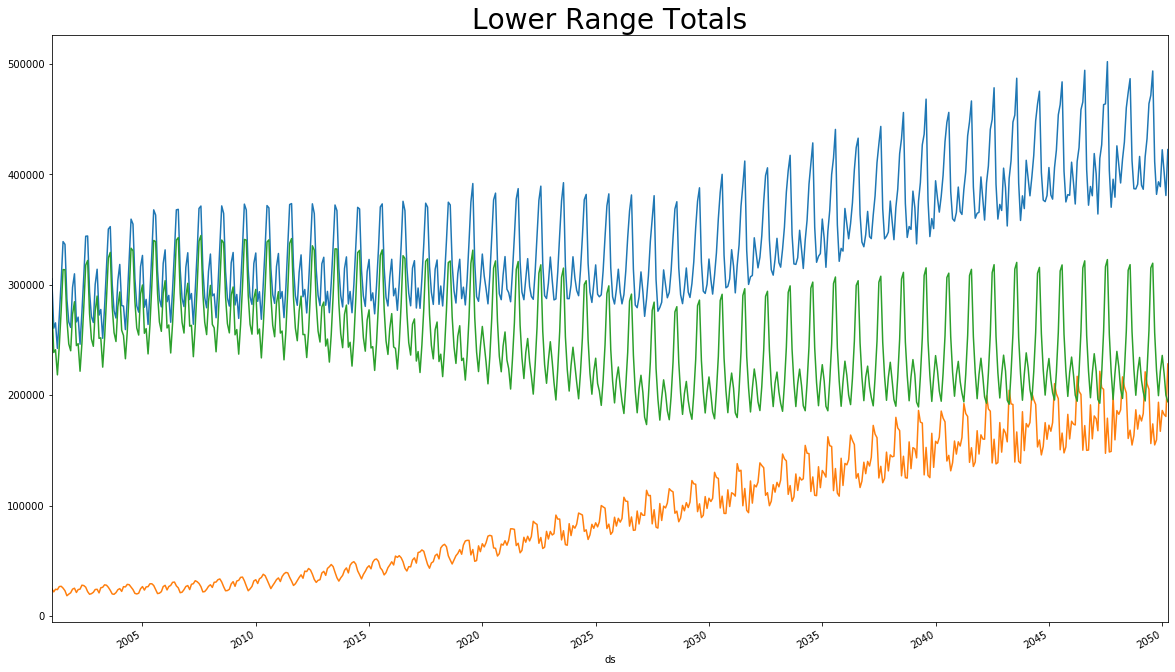

In [327]:
plt.figure(figsize = (20,12))
pred_lower['total'].plot()
pred_lower['renewables'].plot()
pred_lower['nonrenewables'].plot()

plt.title("Lower Range Totals", size = 28);

In [328]:
#Over 50% predictions for midrange
pred_mid[pred_mid['renewables'] > pred_mid['nonrenewables']].head()

coal           ngas        other       nuclear         hydro  \
ds                                                                         
2034-03-31   0.0  136470.222194  1087.635099  64188.463748  29147.731395   
2035-03-31   0.0  136938.533403  1074.717718  64422.107390  28589.960953   
2036-03-31   0.0  142253.223528  1151.555566  65188.993489  29895.869957   
2036-04-30   0.0  160330.201368  1284.431432  70868.638884  32805.941865   
2037-03-31   0.0  142462.291996  1137.770932  65423.910189  30307.399832   

                     wind          geo         solar          bio  petroleum  \
ds                                                                             
2034-03-31  110668.510437  1543.083845  68806.608710  4177.912330        0.0   
2035-03-31  119236.172793  1549.473258  76014.250429  4133.181545        0.0   
2036-03-31  119419.212487  1595.829141  82366.280315  4100.653159        0.0   
2036-04-30  106365.287713  1672.380066  90181.541808  4198.020297        0.0   
2037-03-31  127701.822727  1602.595354  90014.326588  4055.754241        0.0   

               renewables  nonrenewables          total  renewable percent  \
ds                                                                           
2034-03-31  214343.846716  201746.321042  416090.167757           0.515138   
2035-03-31  229523.038979  202435.358511  431958.397490           0.531355   
2036-03-31  237377.845059  208593.772583  445971.617642           0.532271   
2036-04-30  235223.171749  232483.271685  467706.443434           0.502929   
2037-03-31  253681.898742  209023.973118  462705.871860           0.548257   

            nonrenewable percent  
ds                                
2034-03-31              0.484862  
2035-03-31              0.468645  
2036-03-31              0.467729  
2036-04-30              0.497071  
2037-03-31              0.451743

In [329]:
#Over 50% predictions for upper range
pred_upper[pred_upper['renewables'] > pred_upper['nonrenewables']].head()

coal           ngas        other       nuclear  \
ds                                                                   
2033-03-31  38560.553389  144059.739934  1588.060643  70036.860313   
2034-03-31  38655.320345  144925.106594  1603.091542  71052.586070   
2035-03-31  35878.890498  145612.084470  1629.860763  71891.310865   
2035-04-30  39948.255950  166208.199371  1979.668222  77252.052609   
2036-02-29  39364.864777  153253.106337  1913.253507  79272.263145   

                   hydro           wind          geo          solar  \
ds                                                                    
2033-03-31  31290.518458  120813.703813  1608.565710  105240.908387   
2034-03-31  32115.127227  131606.107384  1618.402936  117938.656505   
2035-03-31  31399.732353  141945.511512  1630.532563  132153.234988   
2035-04-30  35148.879919  123093.174369  1725.231233  139550.612483   
2036-02-29  30998.786340  119386.398379  1848.735701  121982.649900   

                    bio    petroleum     renewables  nonrenewables  \
ds                                                                   
2033-03-31  5484.801070  2035.659675  264438.497438  256280.873953   
2034-03-31  5521.739758  2076.473589  288800.033810  258312.578141   
2035-03-31  5629.776244  1993.902883  312758.787660  257006.049479   
2035-04-30  5734.772972  2142.713489  305252.670976  287530.889641   
2036-02-29  6042.638188  1930.508284  280259.208509  275733.996049   

                    total  renewable percent  nonrenewable percent  
ds                                                                  
2033-03-31  520719.371391           0.507833              0.492167  
2034-03-31  547112.611950           0.527862              0.472138  
2035-03-31  569764.837139           0.548926              0.451074  
2035-04-30  592783.560617           0.514948              0.485052  
2036-02-29  555993.204558           0.504069              0.495931

In [330]:
#OVer 50% predictions for lower range
pred_lower[pred_lower['renewables'] > pred_lower['nonrenewables']].head()

coal           ngas       other       nuclear         hydro  \
ds                                                                        
2042-03-31   0.0  139000.307821  166.419270  53595.123651  26493.528971   
2043-03-31   0.0  138388.348987  100.100354  53358.176850  25432.623793   
2044-03-31   0.0  142827.954163   55.761945  52758.142924  25698.525782   
2045-03-31   0.0  142850.609307    0.000000  52769.924454  27129.774934   
2046-03-31   0.0  142770.580388    0.000000  51785.285668  27314.408163   

                     wind          geo         solar          bio  petroleum  \
ds                                                                             
2042-03-31  126059.482040  1521.977763  43998.606963  1318.089075        0.0   
2043-03-31  131850.856697  1521.197521  44595.869762  1103.197429        0.0   
2044-03-31  128649.297280  1556.488316  45394.412229   807.868585        0.0   
2045-03-31  134862.388814  1567.975117  46245.642170   626.194534        0.0   
2046-03-31  140735.479856  1547.090327  47125.399488   401.465455        0.0   

               renewables  nonrenewables          total  renewable percent  \
ds                                                                           
2042-03-31  199391.684812  192761.850743  392153.535555           0.508453   
2043-03-31  204503.745202  191846.626191  396350.371393           0.515967   
2044-03-31  202106.592192  195641.859031  397748.451223           0.508127   
2045-03-31  210431.975568  195620.533761  406052.509329           0.518238   
2046-03-31  217123.843290  194555.866056  411679.709346           0.527410   

            nonrenewable percent  
ds                                
2042-03-31              0.491547  
2043-03-31              0.484033  
2044-03-31              0.491873  
2045-03-31              0.481762  
2046-03-31              0.472590

## PRELIMINARY ESTIMATE:

It bumps around a lot, but the first time that invisible threshold is reached will likely be between 2033 and 2042

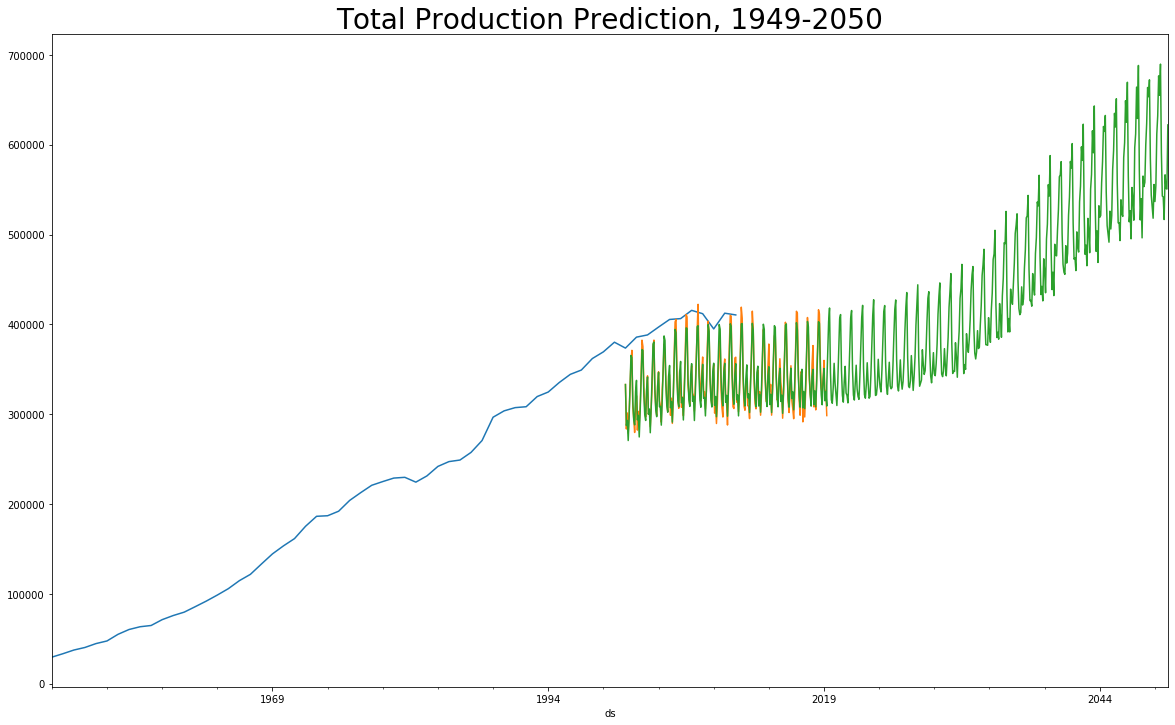

In [331]:
plt.figure(figsize = (20,12))
df_past['Total'].plot()
df_recent['Total'].plot()
pred_mid['total'].plot()
plt.title("Total Production Prediction, 1949-2050", size = 28);

In [332]:
df_recent['Total'].tail()

date
2018-12-01    339631.0
2019-01-01    359953.0
2019-02-01    315754.0
2019-03-01    326566.0
2019-04-01    298531.0
Name: Total, dtype: float64

Text(0.5, 1.0, 'Midrange Prediction versus Actual')

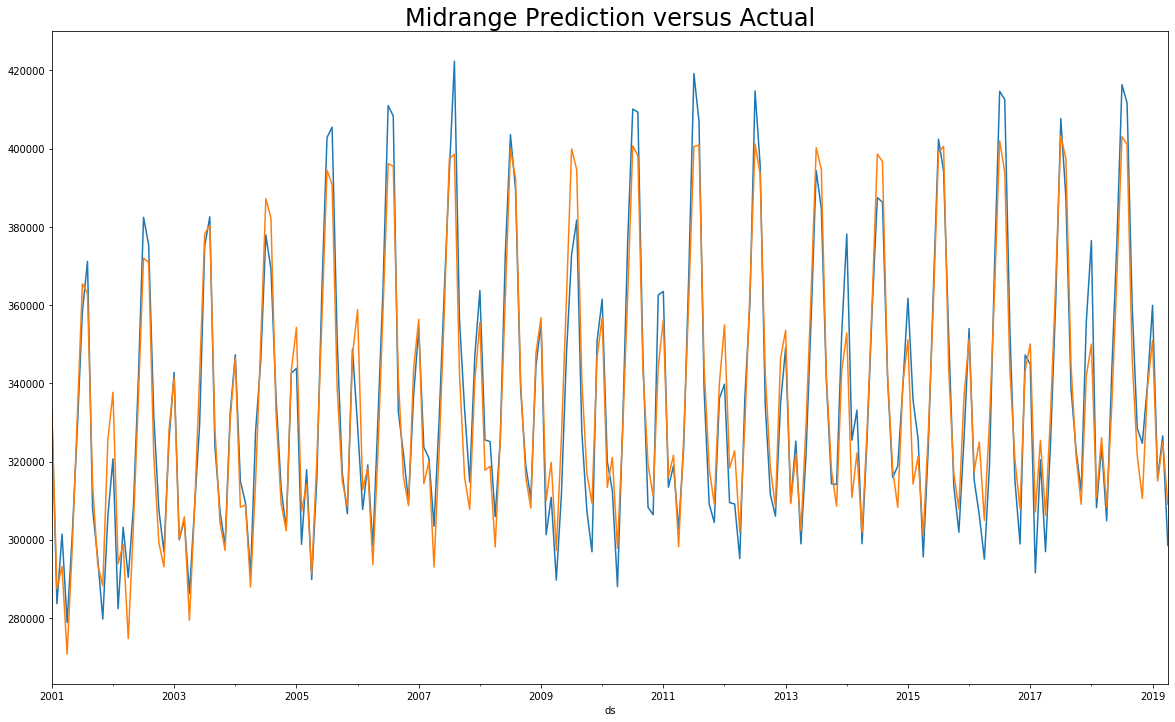

In [333]:
plt.figure(figsize = (20,12))
df_recent['Total'].plot()
pred_mid['total'][:'2019-04-01'].plot()
plt.title("Midrange Prediction versus Actual", size = 24)

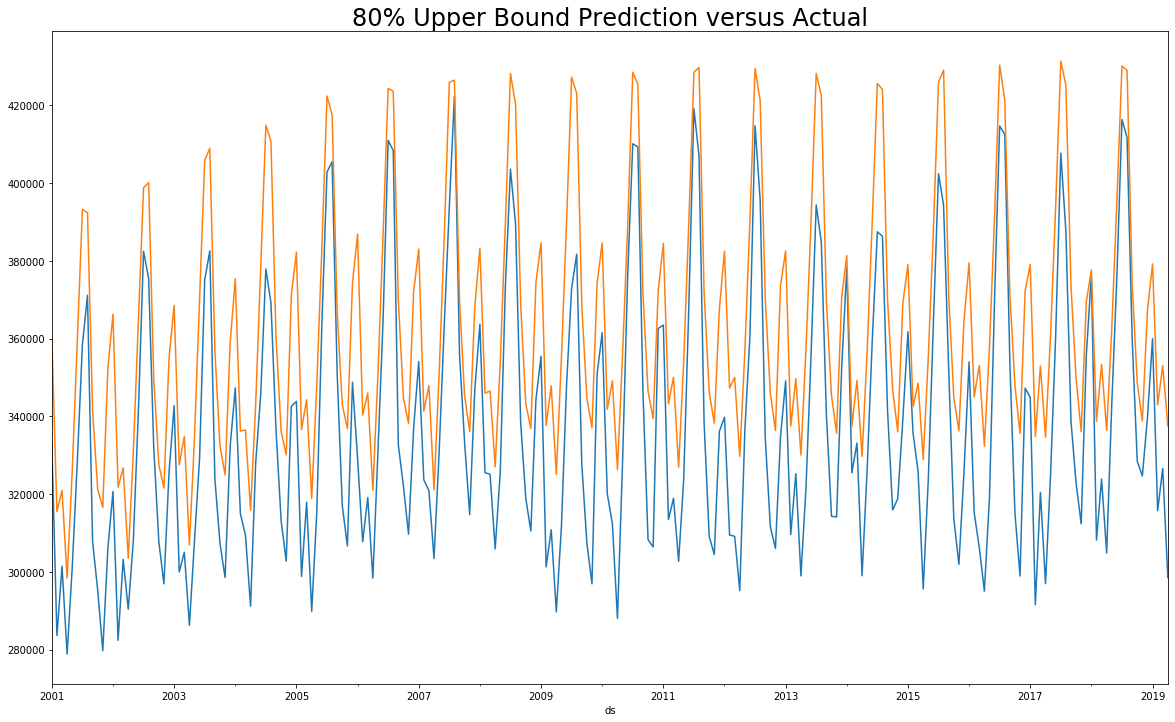

In [334]:
plt.figure(figsize = (20,12))
df_recent['Total'].plot()
pred_upper['total'][:'2019-04-01'].plot()
plt.title("80% Upper Bound Prediction versus Actual", size = 24);

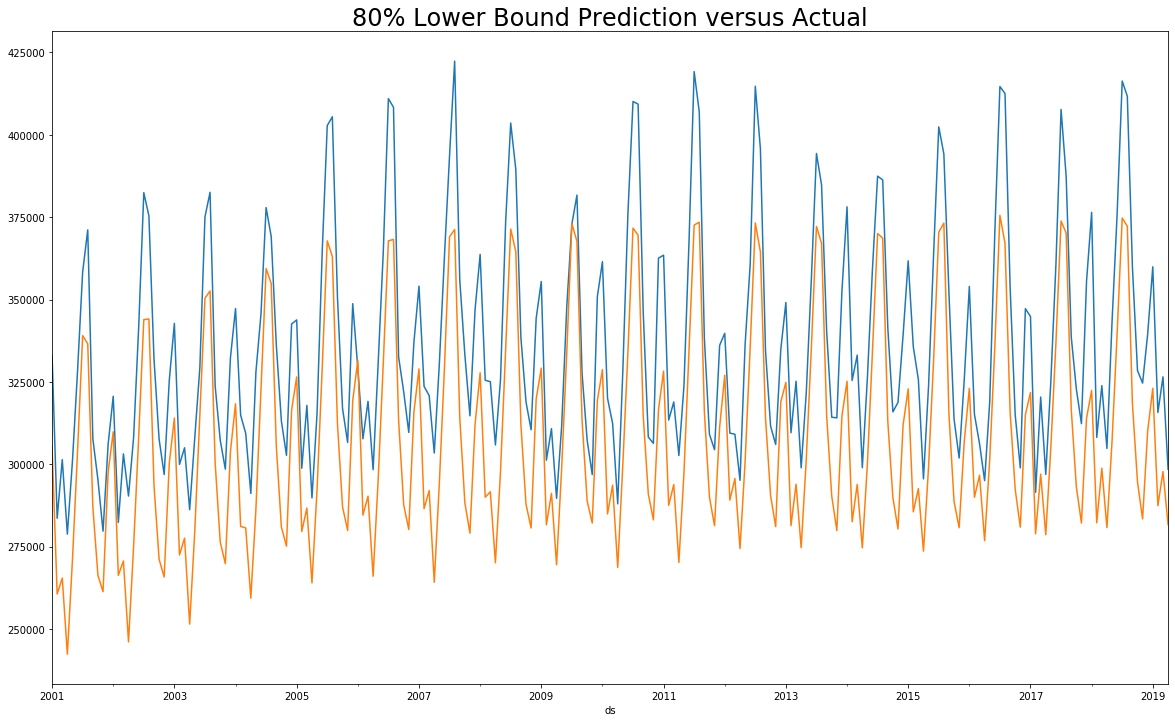

In [335]:
plt.figure(figsize = (20,12))
df_recent['Total'].plot()
pred_lower['total'][:'2019-04-01'].plot()
plt.title("80% Lower Bound Prediction versus Actual", size = 24);

Text(0.5, 1.0, 'Total Predictions Upper Mid and Lower Versus Actual, 2002-2019')

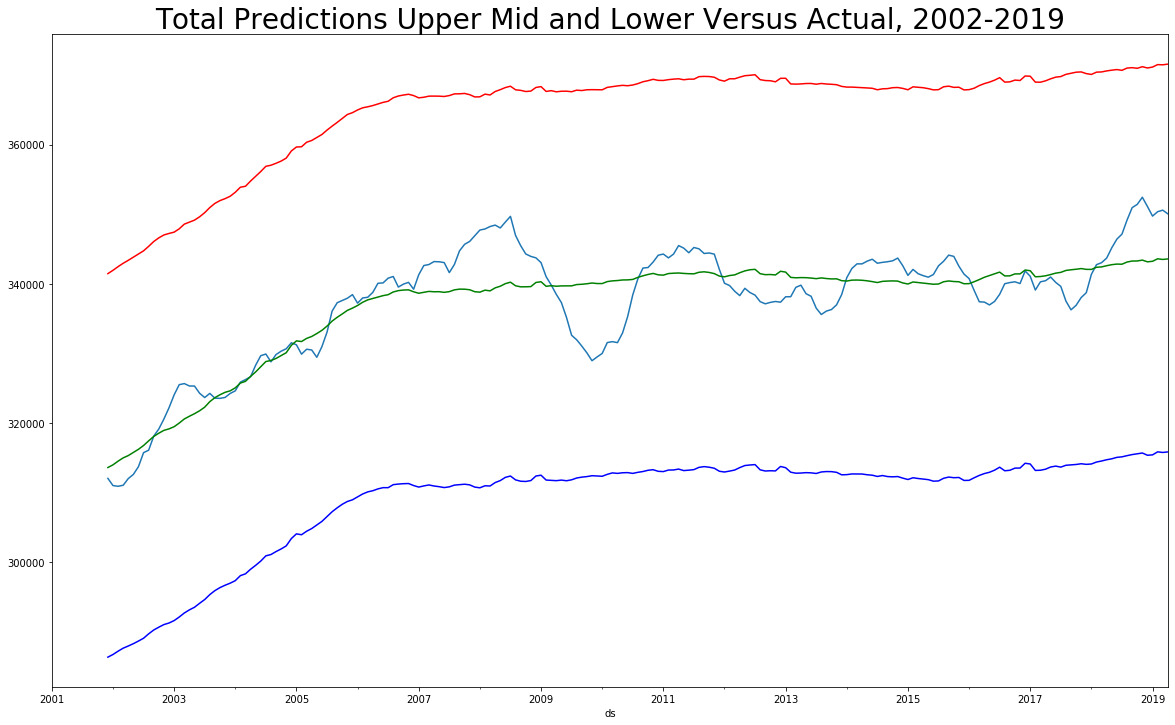

In [336]:
plt.figure(figsize = (20,12))
df_recent['Total'].rolling(12).mean().plot()
pred_lower['total'][:'2019-04-01'].rolling(12).mean().plot(color = 'blue')
pred_mid['total'][:'2019-04-01'].rolling(12).mean().plot(color = 'green')
pred_upper['total'][:'2019-04-01'].rolling(12).mean().plot(color = 'red')
plt.title("Total Predictions Upper Mid and Lower Versus Actual, 2002-2019", size= 28)

In [337]:
from sklearn import metrics

In [338]:
metrics.r2_score(df_recent['Total'],pred_mid['total'][:'2019-04-01'])

0.9285544163449269

In [339]:
metrics.r2_score(df_recent['Total'],pred_upper['total'][:'2019-04-01'])

0.28320020307011884

In [340]:
metrics.r2_score(df_recent['Total'],pred_lower['total'][:'2019-04-01'])

0.2331310126832956

## Overall accuracy:

I did not specifically model the total, however by combining all of my other predictions and comparing it to the total, my r2 score was 92.9 percent! 

https://www.forbes.com/sites/judeclemente/2018/08/26/why-u-s-electricity-demand-will-increase/#e7e9fc06dfb3
- Why demand will increase

https://www.powerengineeringint.com/articles/2017/11/iea-spotlights-deep-rippling-effect-of-electrification.html

- "Deep Electrification"

Text(0.5, 1.0, 'Predicted Percentage of Total For Major Sectors')

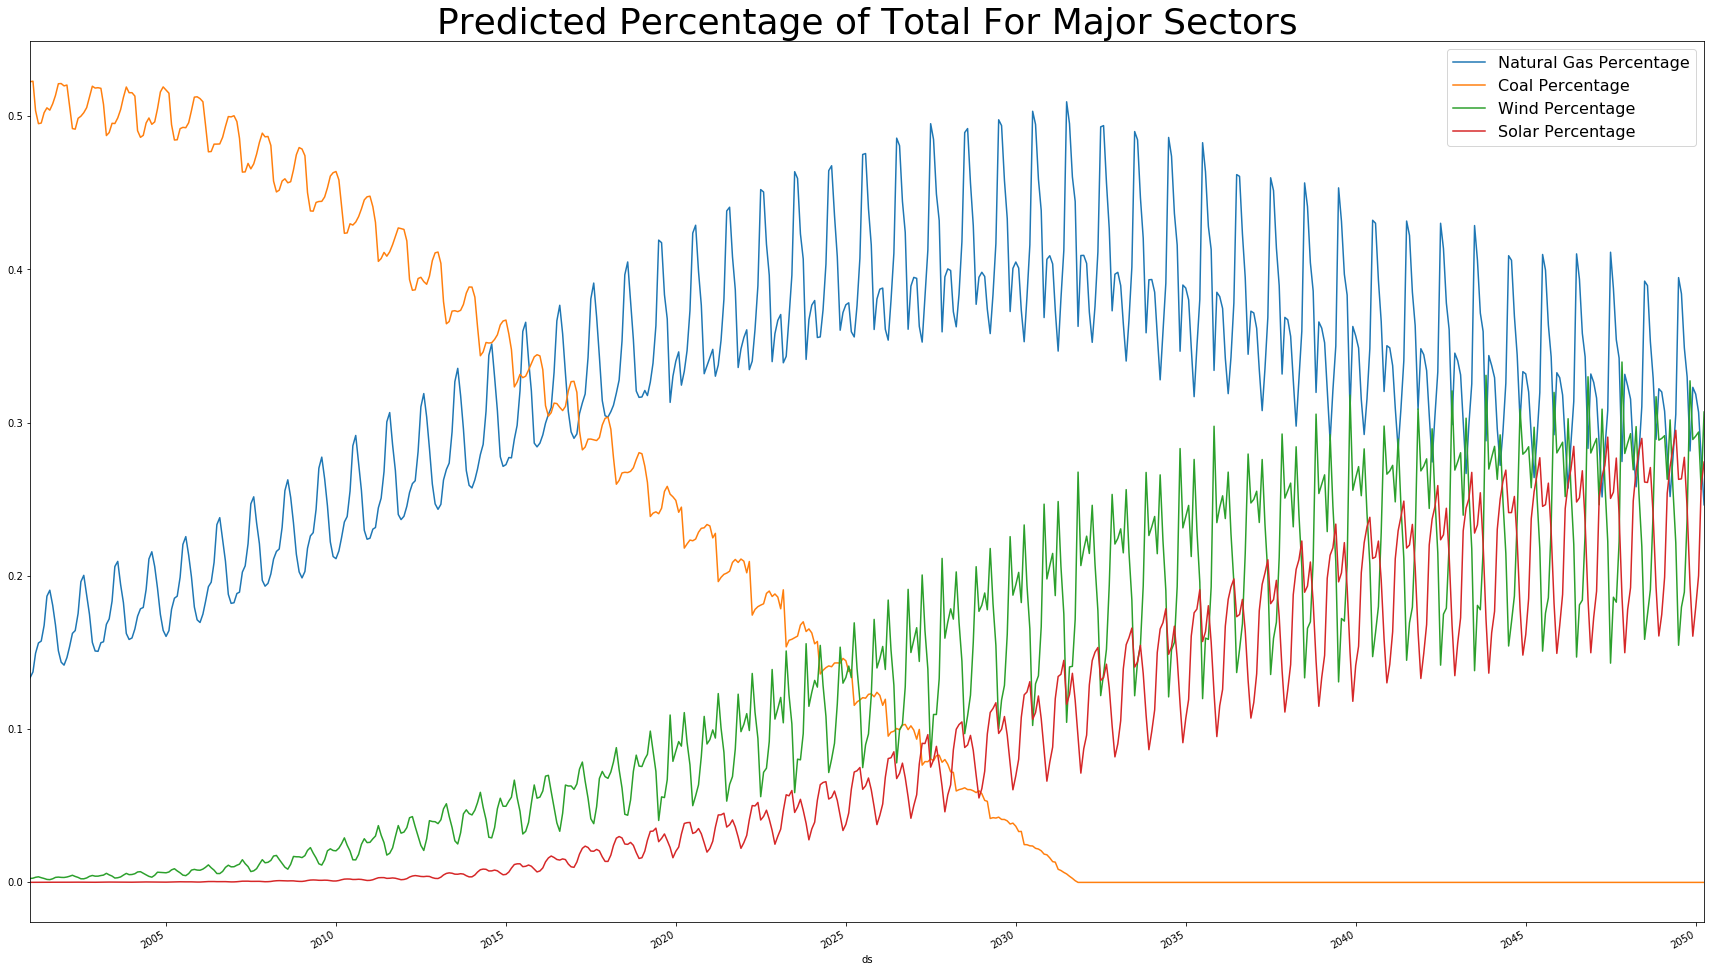

In [341]:
plt.figure(figsize = (30,18))
(pred_mid['ngas'] / pred_mid['total']).plot(label = 'Natural Gas Percentage')
(pred_mid['coal'] / pred_mid['total']).plot(label = 'Coal Percentage')
(pred_mid['wind'] / pred_mid['total']).plot(label = 'Wind Percentage')
(pred_mid['solar'] / pred_mid['total']).plot(label = 'Solar Percentage')

plt.legend(fontsize = 16)
plt.title("Predicted Percentage of Total For Major Sectors", size = 36)

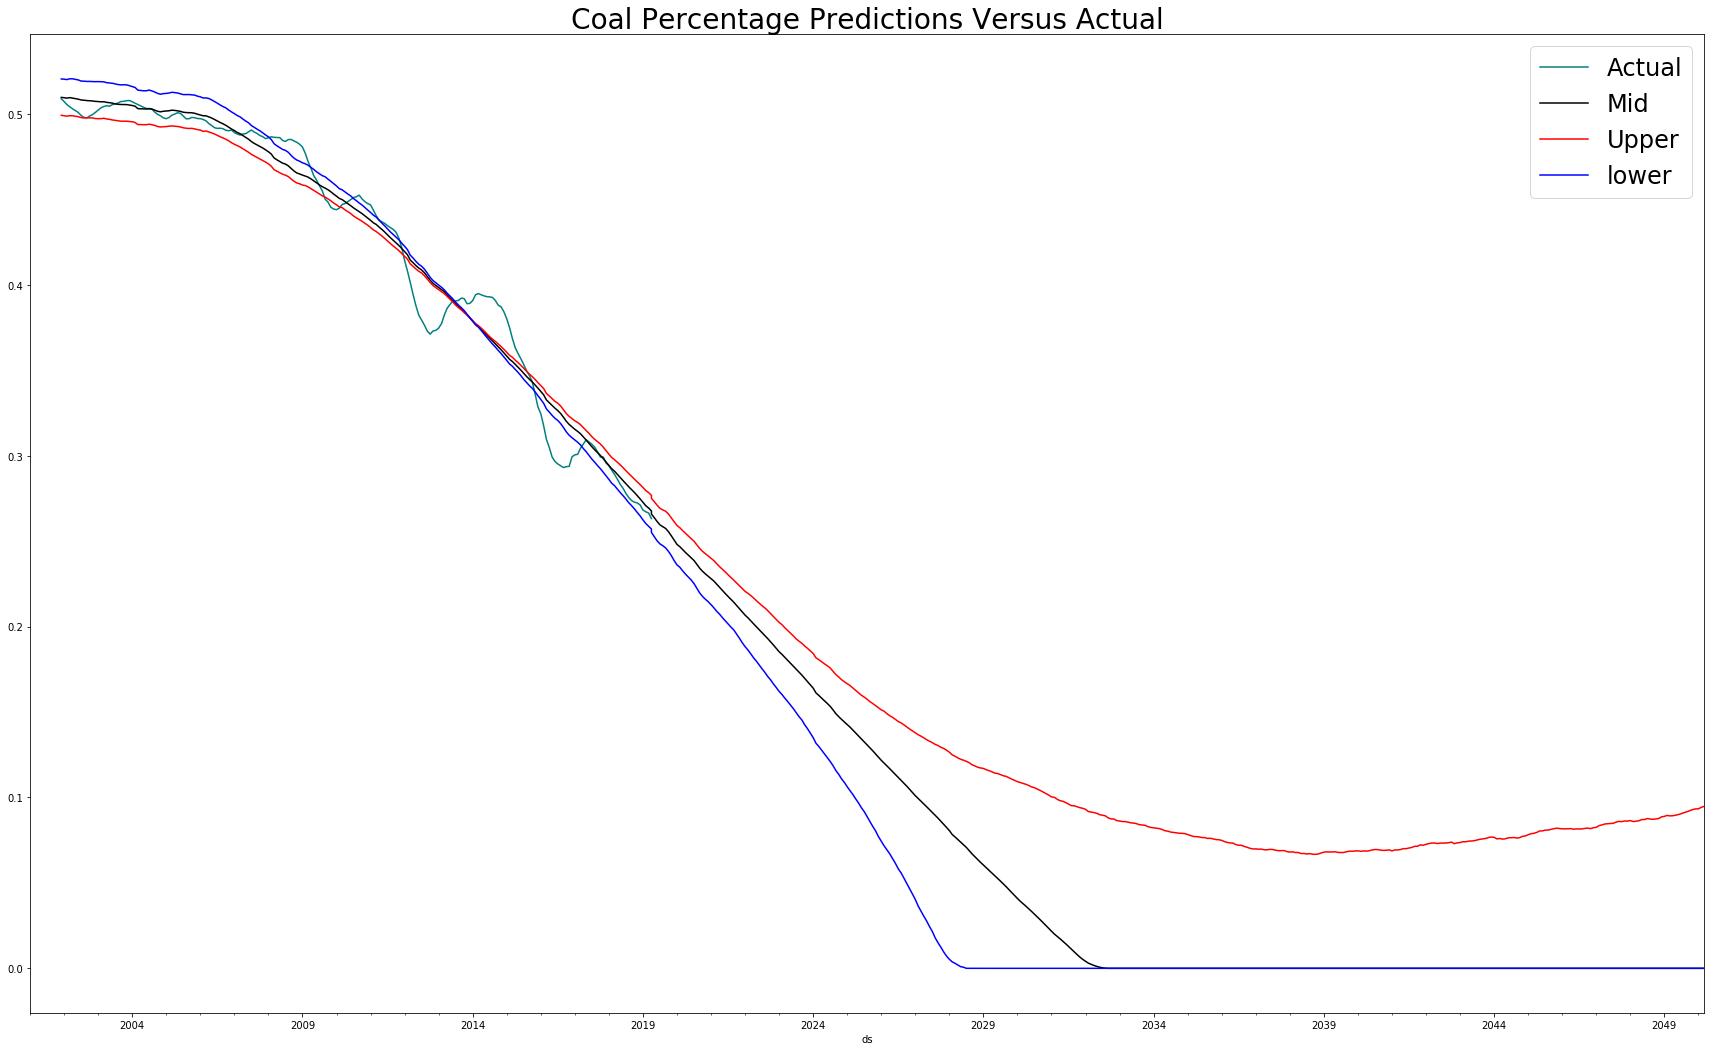

In [342]:
plt.figure(figsize = (30,18))
(df_recent['Coal']/df_recent['Total']).rolling(12).mean().plot(color = 'teal', label = 'Actual')
(pred_mid['coal'] / pred_mid['total']).rolling(12).mean().plot(color = 'black', label = 'Mid')
(pred_upper['coal'] / pred_upper['total']).rolling(12).mean().plot(color = 'red', label = 'Upper')
(pred_lower['coal'] / pred_lower['total']).rolling(12).mean().plot(color = 'blue', label = "lower")
plt.title("Coal Percentage Predictions Versus Actual", size = 28)
plt.legend(fontsize = 24);

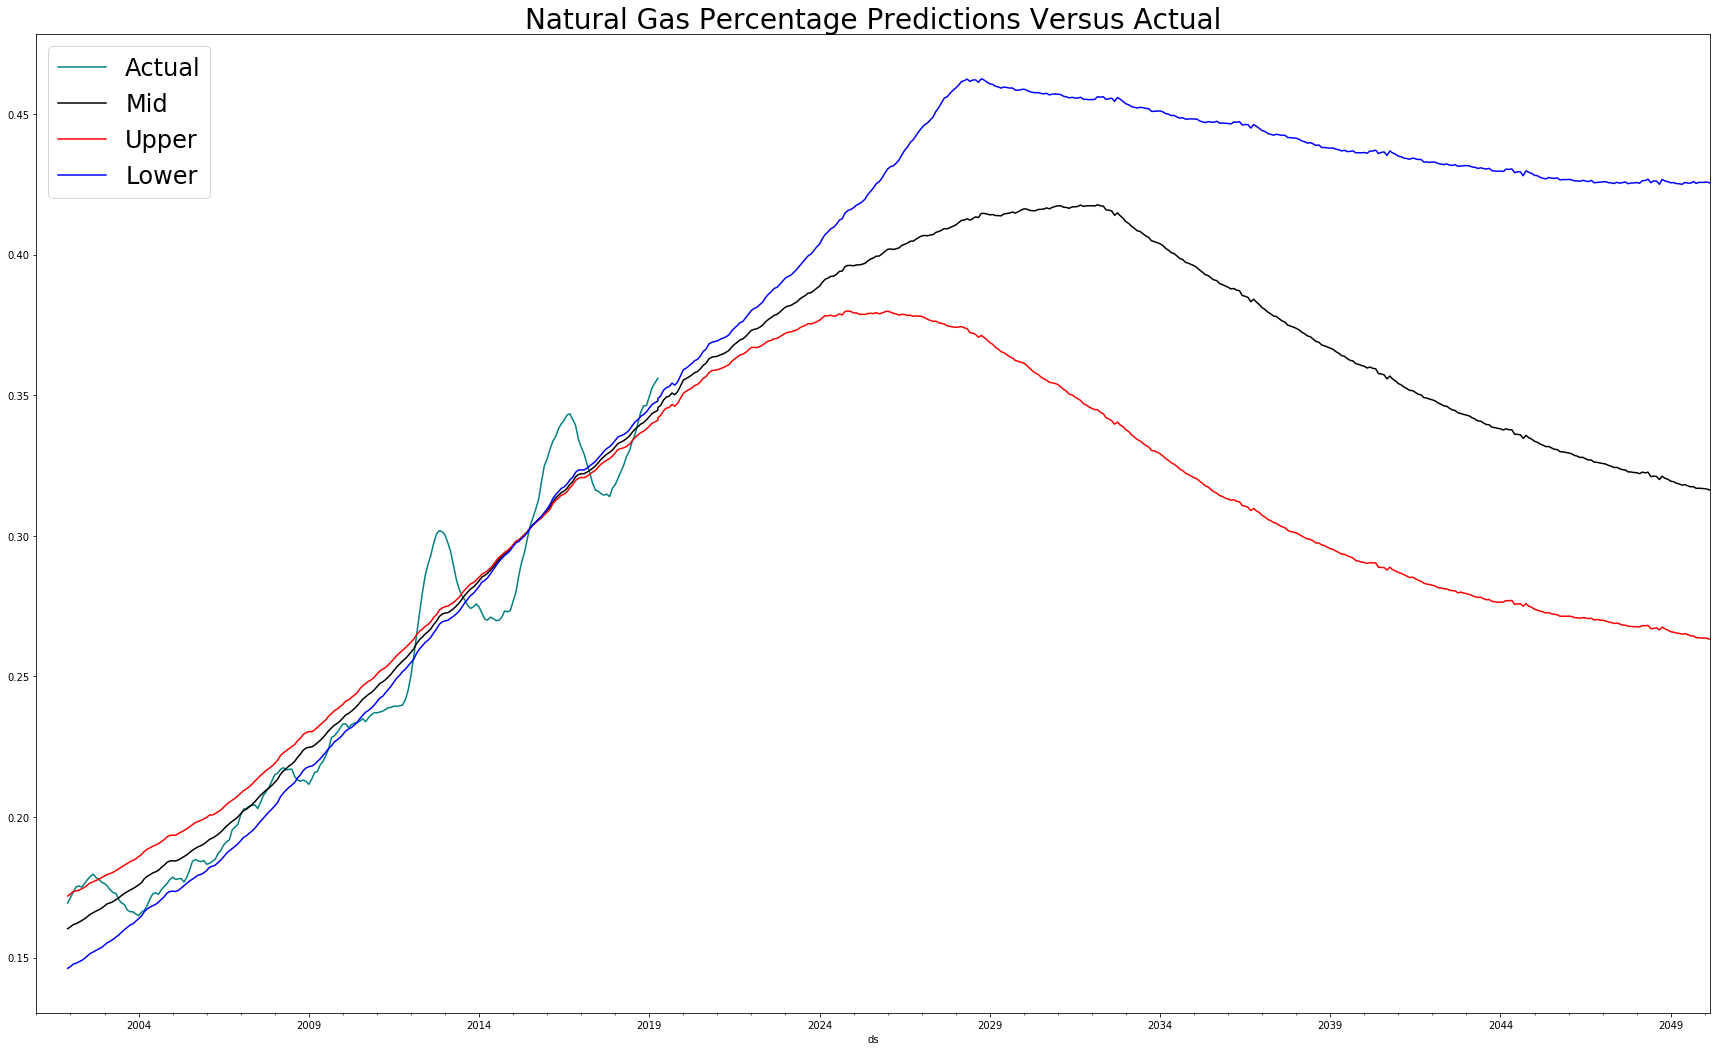

In [343]:
plt.figure(figsize = (30,18))
(df_recent['Natural Gas']/df_recent['Total']).rolling(12).mean().plot(color = 'teal', label = 'Actual')
(pred_mid['ngas'] / pred_mid['total']).rolling(12).mean().plot(color = 'black', label = 'Mid')
(pred_upper['ngas'] / pred_upper['total']).rolling(12).mean().plot(color = 'red', label = "Upper")
(pred_lower['ngas'] / pred_lower['total']).rolling(12).mean().plot(color = 'blue', label = "Lower")
plt.title("Natural Gas Percentage Predictions Versus Actual", size = 28)
plt.legend(fontsize = 24);

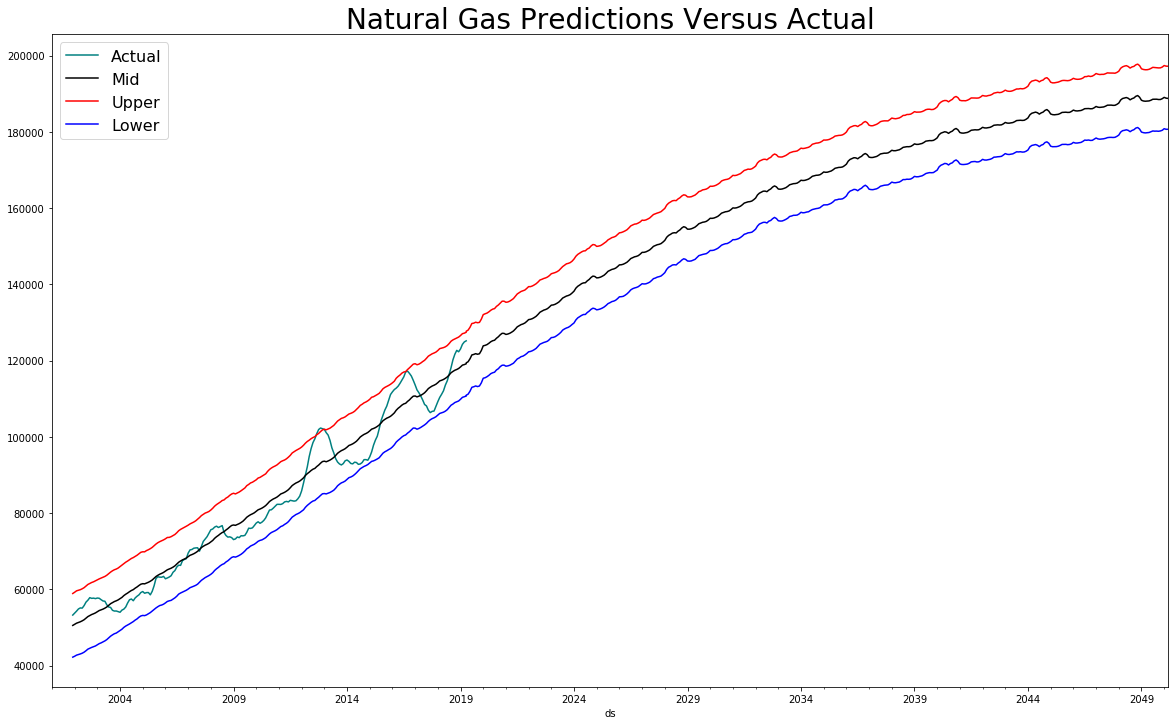

In [344]:
plt.figure(figsize = (20,12))
(df_recent['Natural Gas']).rolling(12).mean().plot(color = 'teal', label = 'Actual')
(pred_mid['ngas']).rolling(12).mean().plot(color = 'black', label = 'Mid')
(pred_upper['ngas']).rolling(12).mean().plot(color = 'red', label = 'Upper')
(pred_lower['ngas']).rolling(12).mean().plot(color = 'blue', label = "Lower")
plt.title("Natural Gas Predictions Versus Actual", size = 28)
plt.legend(fontsize = 16)

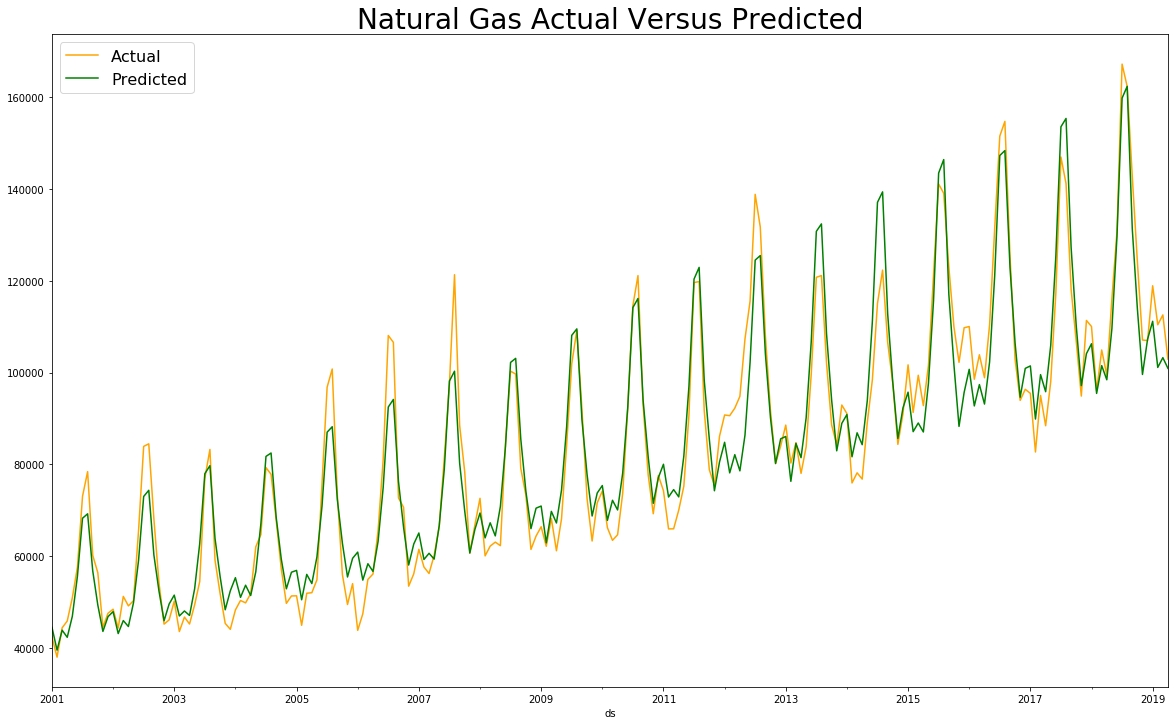

In [345]:
plt.figure(figsize = (20,12))
df_recent['Natural Gas'].plot(color = 'orange', label = 'Actual')
#pred_lower['ngas'][:'2019-04-01'].rolling(12).mean().plot(color = 'blue')
pred_mid['ngas'][:'2019-04-01'].plot(color = 'green', label = "Predicted")
#pred_upper['ngas'][:'2019-04-01'].rolling(12).mean().plot(color = 'red')
plt.title("Natural Gas Actual Versus Predicted", size = 28)
plt.legend(fontsize = 16);

In [346]:
metrics.r2_score(df_recent['Natural Gas'],pred_mid['ngas'][:'2019-04-01'])

0.9408196128201329

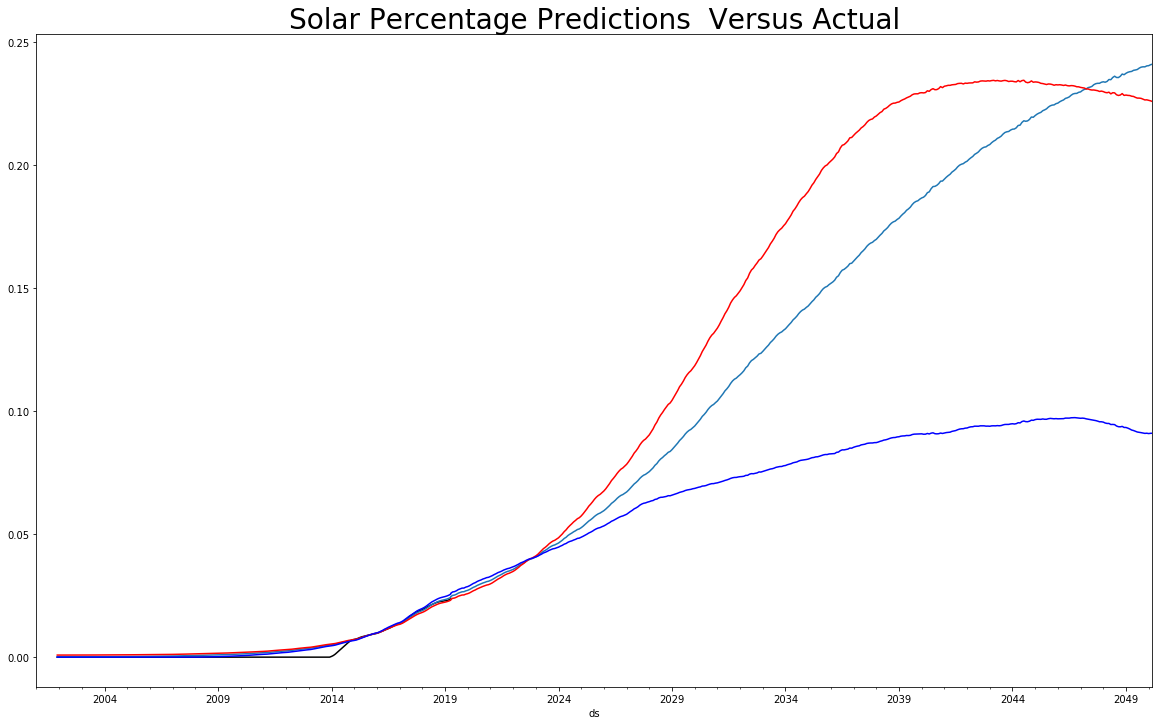

In [347]:
plt.figure(figsize = (20,12))
(df_recent['Solar/PV']/df_recent['Total']).rolling(12).mean().plot(color = 'black')
(pred_mid['solar'] / pred_mid['total']).rolling(12).mean().plot()
(pred_upper['solar'] / pred_upper['total']).rolling(12).mean().plot(color = 'red')
(pred_lower['solar'] / pred_lower['total']).rolling(12).mean().plot(color = 'blue')
plt.title("Solar Percentage Predictions  Versus Actual", size = 28);

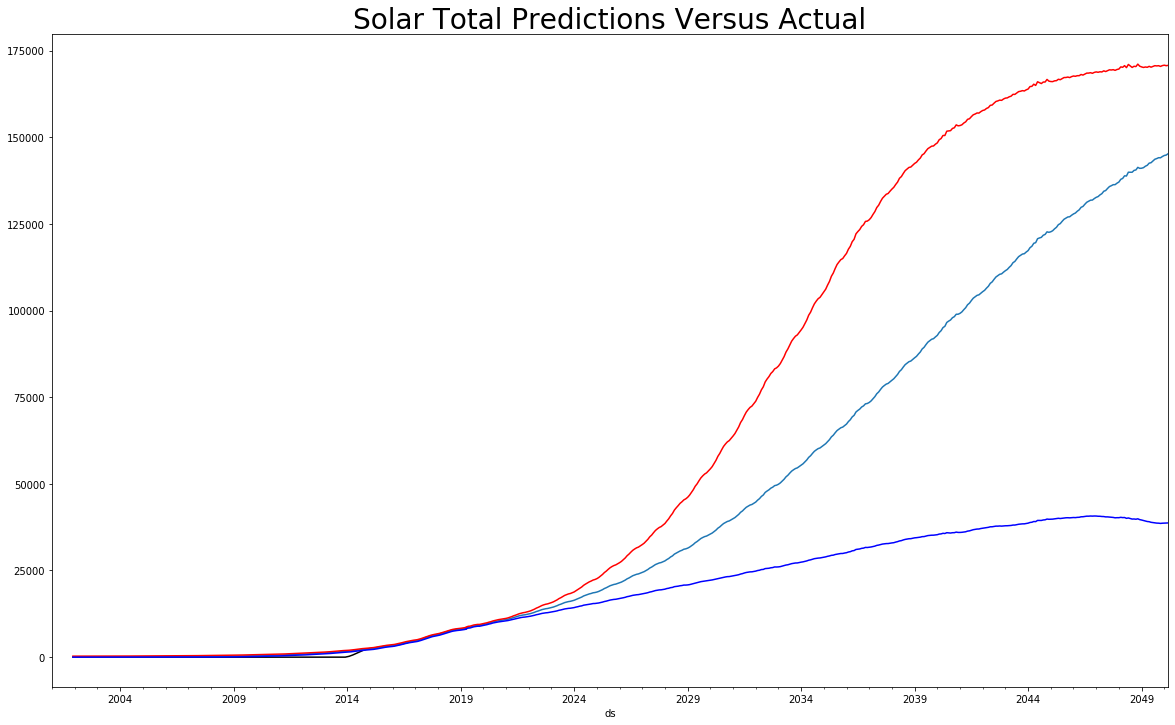

In [348]:
plt.figure(figsize = (20,12))
(df_recent['Solar/PV']).rolling(12).mean().plot(color = 'black')
(pred_mid['solar']).rolling(12).mean().plot()
(pred_upper['solar']).rolling(12).mean().plot(color = 'red')
(pred_lower['solar']).rolling(12).mean().plot(color = 'blue')
plt.title("Solar Total Predictions Versus Actual", size = 28);

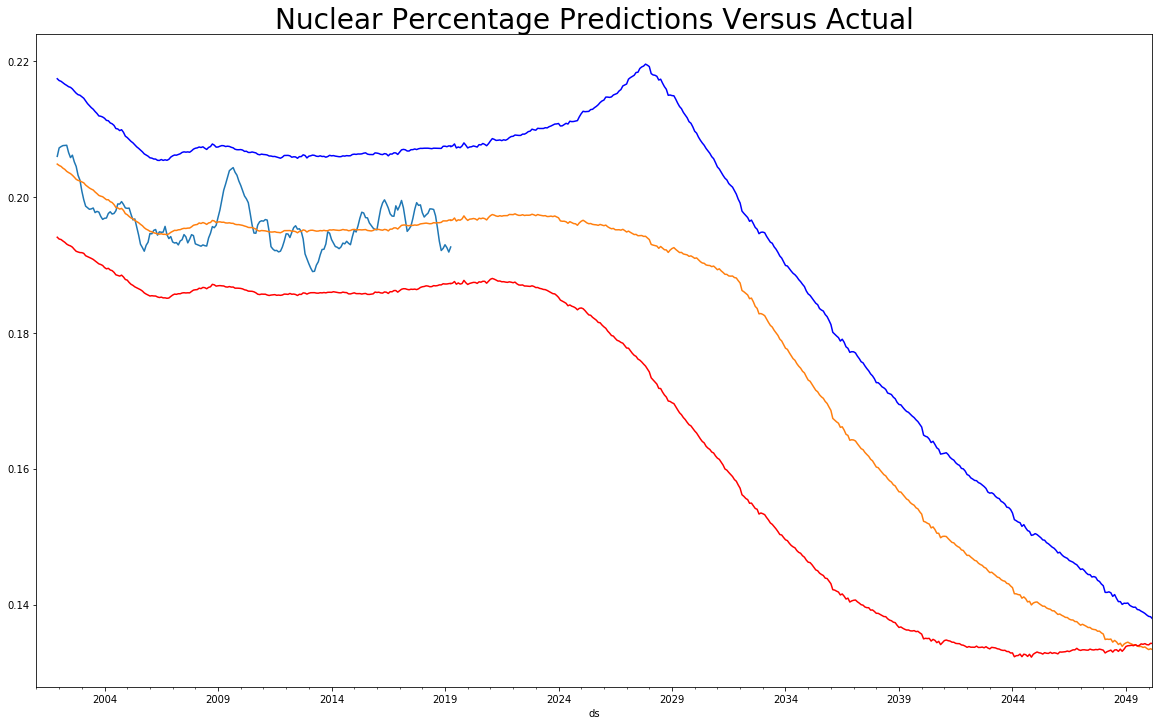

In [349]:
plt.figure(figsize = (20,12))
(df_recent['Nuclear']/df_recent['Total']).rolling(12).mean().plot()
(pred_mid['nuclear'] / pred_mid['total']).rolling(12).mean().plot()
(pred_upper['nuclear'] / pred_upper['total']).rolling(12).mean().plot(color = 'red')
(pred_lower['nuclear'] / pred_lower['total']).rolling(12).mean().plot(color = 'blue')
plt.title("Nuclear Percentage Predictions Versus Actual", size = 28);

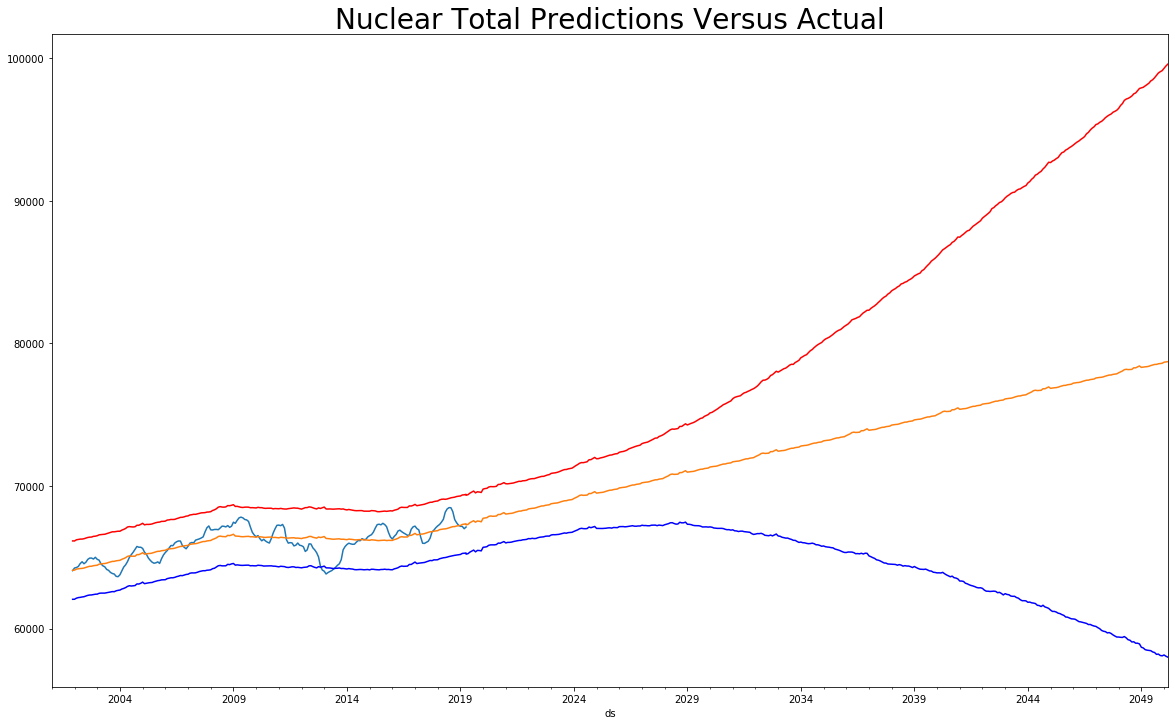

In [350]:
plt.figure(figsize = (20,12))
(df_recent['Nuclear']).rolling(12).mean().plot()
(pred_mid['nuclear']).rolling(12).mean().plot()
(pred_upper['nuclear']).rolling(12).mean().plot(color = 'red')
(pred_lower['nuclear']).rolling(12).mean().plot(color = 'blue')
plt.title("Nuclear Total Predictions Versus Actual", size = 28);

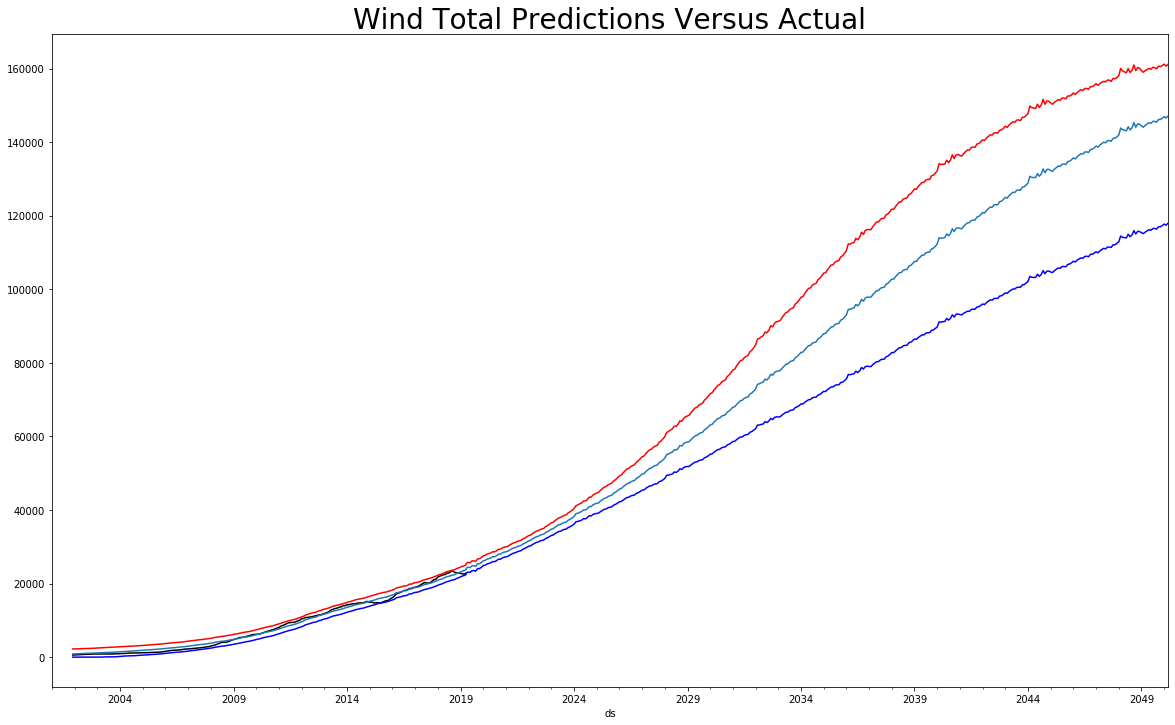

In [351]:
plt.figure(figsize = (20,12))
(df_recent['Wind']).rolling(12).mean().plot(color = 'black')
(pred_mid['wind']).rolling(12).mean().plot()
(pred_upper['wind']).rolling(12).mean().plot(color = 'red')
(pred_lower['wind']).rolling(12).mean().plot(color = 'blue')
plt.title("Wind Total Predictions Versus Actual", size = 28);

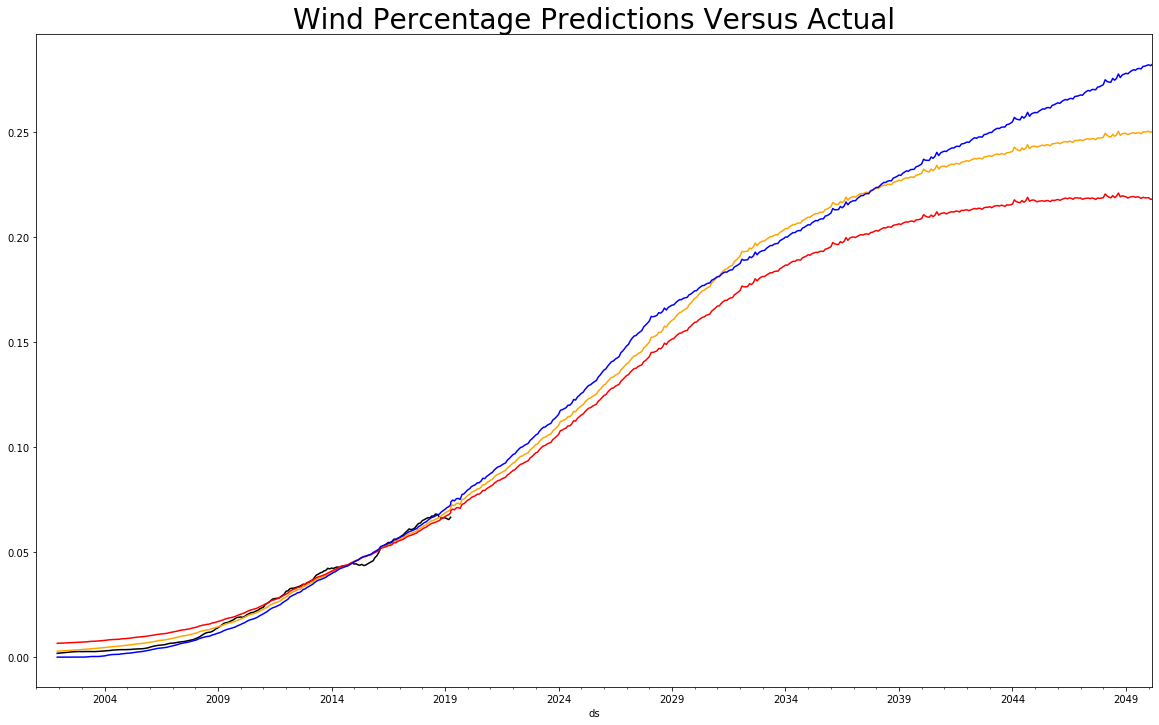

In [352]:
plt.figure(figsize = (20,12))
(df_recent['Wind']/df_recent['Total']).rolling(12).mean().plot(color = 'black')
(pred_mid['wind'] / pred_mid['total']).rolling(12).mean().plot(color = 'orange')
(pred_upper['wind'] / pred_upper['total']).rolling(12).mean().plot(color = 'red')
(pred_lower['wind'] / pred_lower['total']).rolling(12).mean().plot(color = 'blue')
plt.title("Wind Percentage Predictions Versus Actual", size = 28);

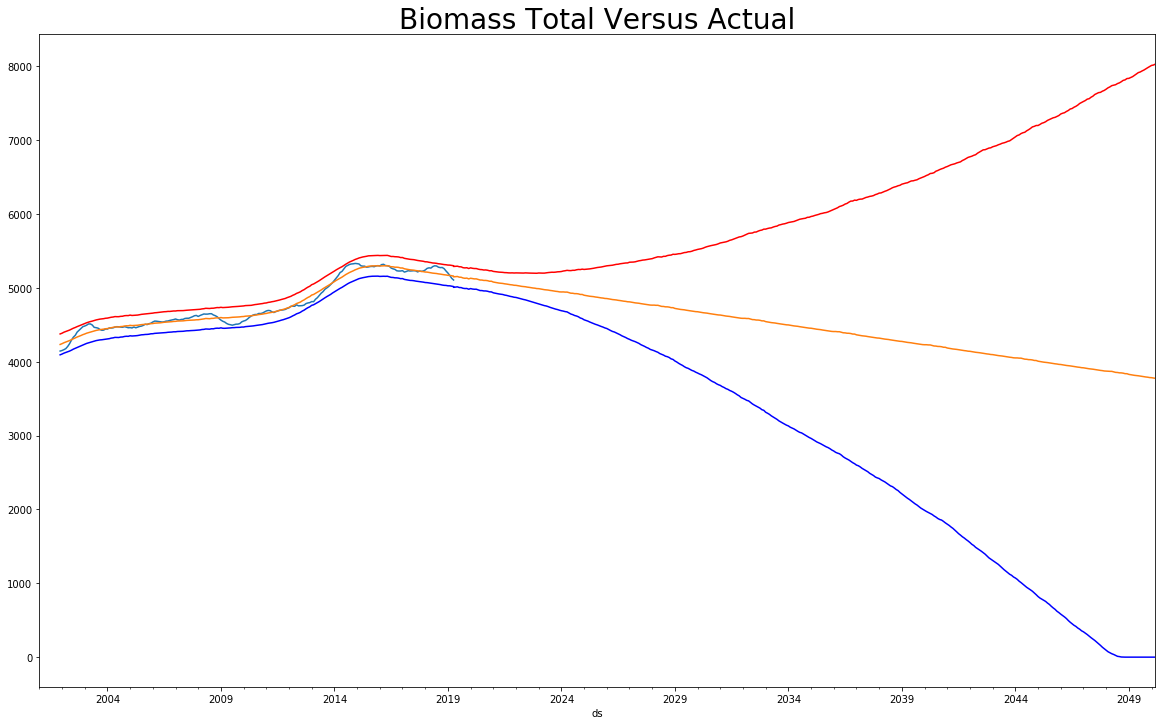

In [353]:
plt.figure(figsize = (20,12))
(df_recent['Biomass Total']).rolling(12).mean().plot()
(pred_mid['bio']).rolling(12).mean().plot()
(pred_upper['bio']).rolling(12).mean().plot(color = 'red')
(pred_lower['bio']).rolling(12).mean().plot(color = 'blue')
plt.title("Biomass Total Versus Actual", size = 28);

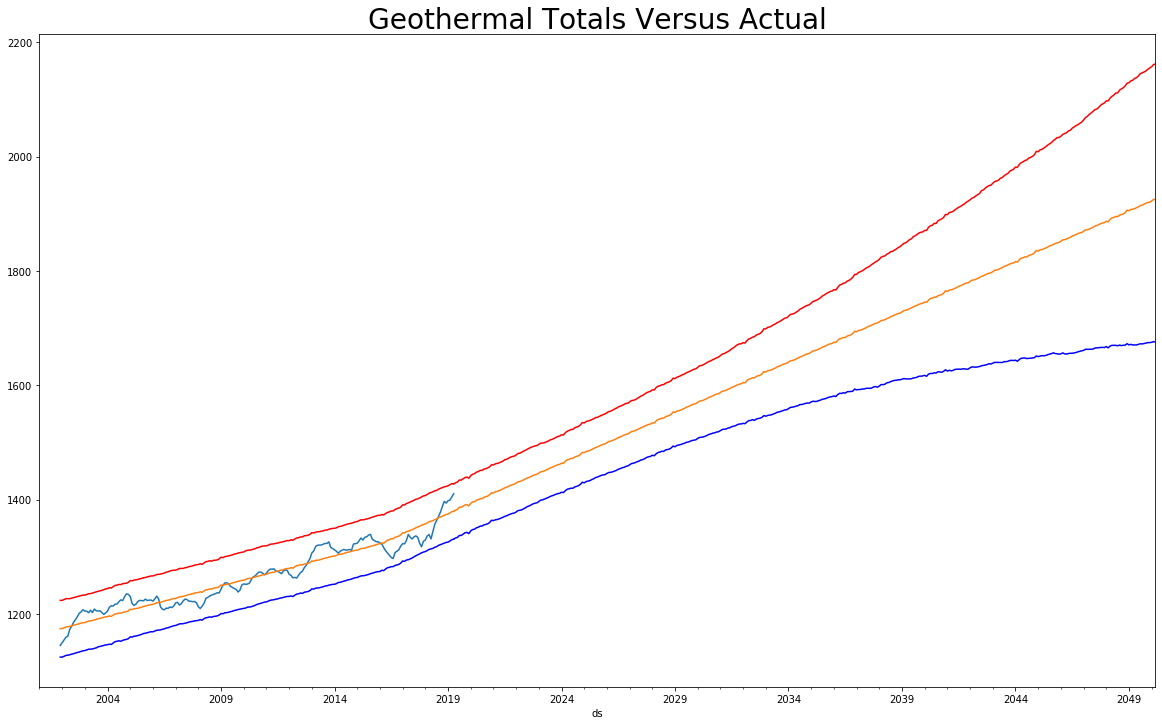

In [354]:
plt.figure(figsize = (20,12))
(df_recent['Geo- thermal']).rolling(12).mean().plot()
(pred_mid['geo']).rolling(12).mean().plot()
(pred_upper['geo']).rolling(12).mean().plot(color = 'red')
(pred_lower['geo']).rolling(12).mean().plot(color = 'blue')
plt.title("Geothermal Totals Versus Actual", size = 28);

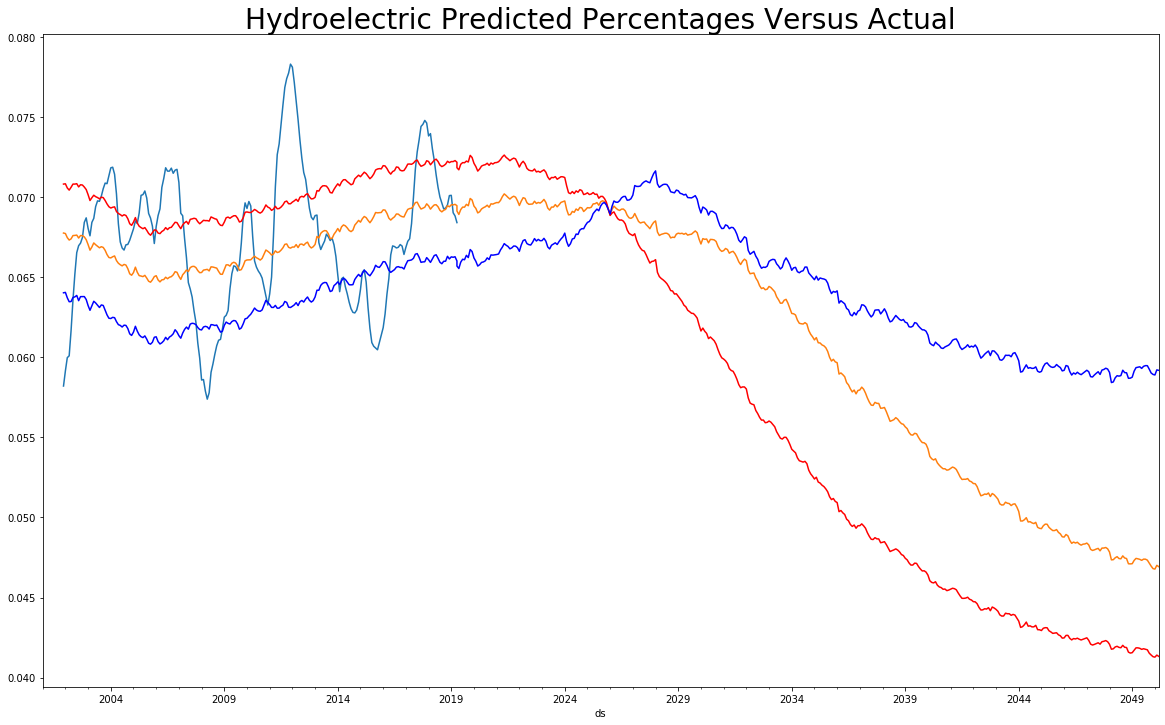

In [355]:
plt.figure(figsize = (20,12))
(df_recent['Conventional Hydroelectric Power']/df_recent['Total']).rolling(12).mean().plot()
(pred_mid['hydro'] / pred_mid['total']).rolling(12).mean().plot()
(pred_upper['hydro'] / pred_upper['total']).rolling(12).mean().plot(color = 'red')
(pred_lower['hydro'] / pred_lower['total']).rolling(12).mean().plot(color = 'blue')
plt.title("Hydroelectric Predicted Percentages Versus Actual", size = 28);

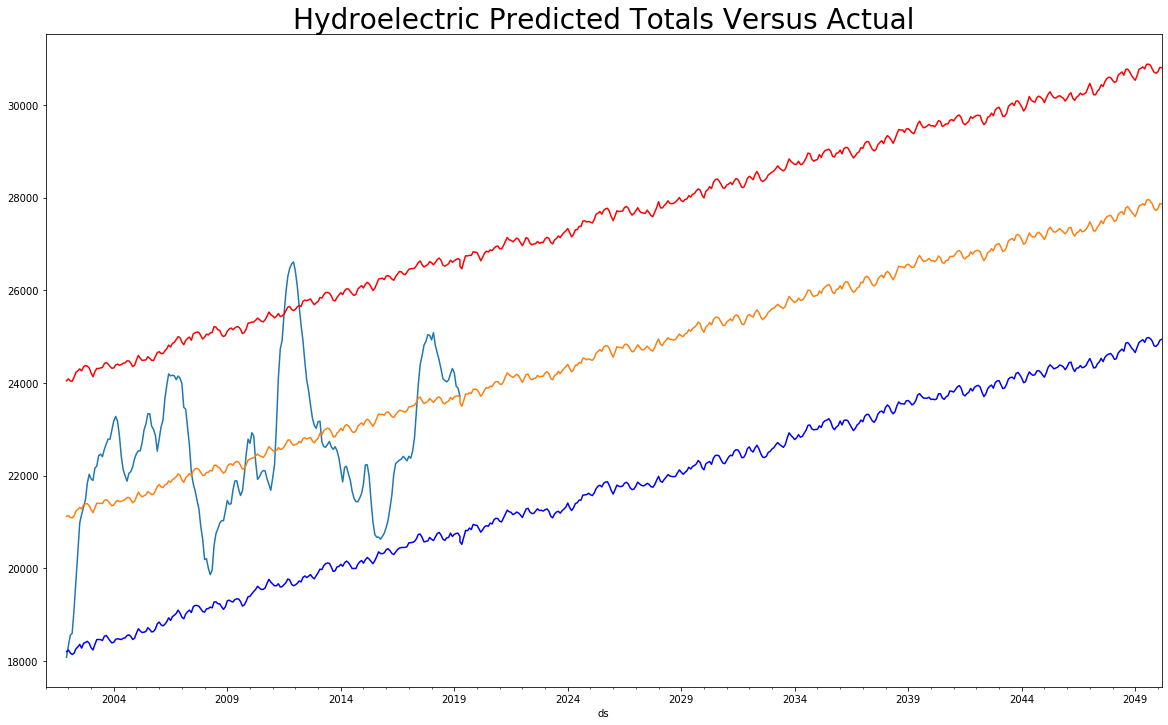

In [356]:
plt.figure(figsize = (20,12))
(df_recent['Conventional Hydroelectric Power']).rolling(12).mean().plot()
(pred_mid['hydro']).rolling(12).mean().plot()
(pred_upper['hydro']).rolling(12).mean().plot(color = 'red')
(pred_lower['hydro']).rolling(12).mean().plot(color = 'blue')
plt.title("Hydroelectric Predicted Totals Versus Actual", size = 28);

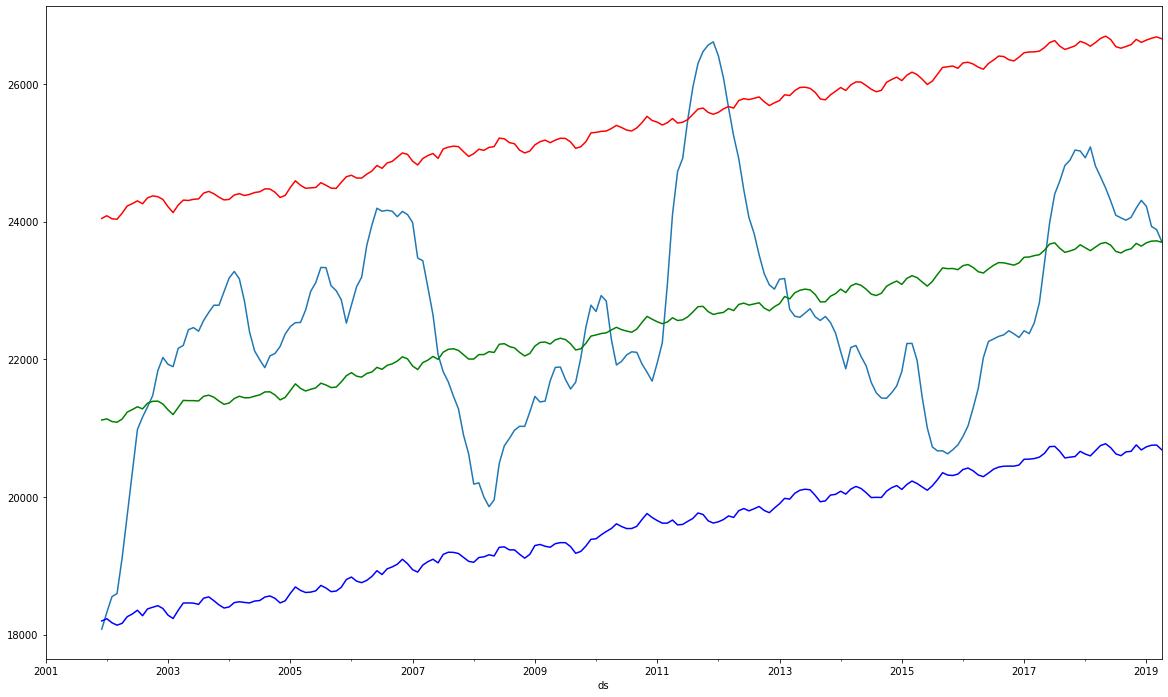

In [357]:
plt.figure(figsize = (20,12))
df_recent['Conventional Hydroelectric Power'].rolling(12).mean().plot()
pred_lower['hydro'][:'2019-04-01'].rolling(12).mean().plot(color = 'blue')
pred_mid['hydro'][:'2019-04-01'].rolling(12).mean().plot(color = 'green')
pred_upper['hydro'][:'2019-04-01'].rolling(12).mean().plot(color = 'red')

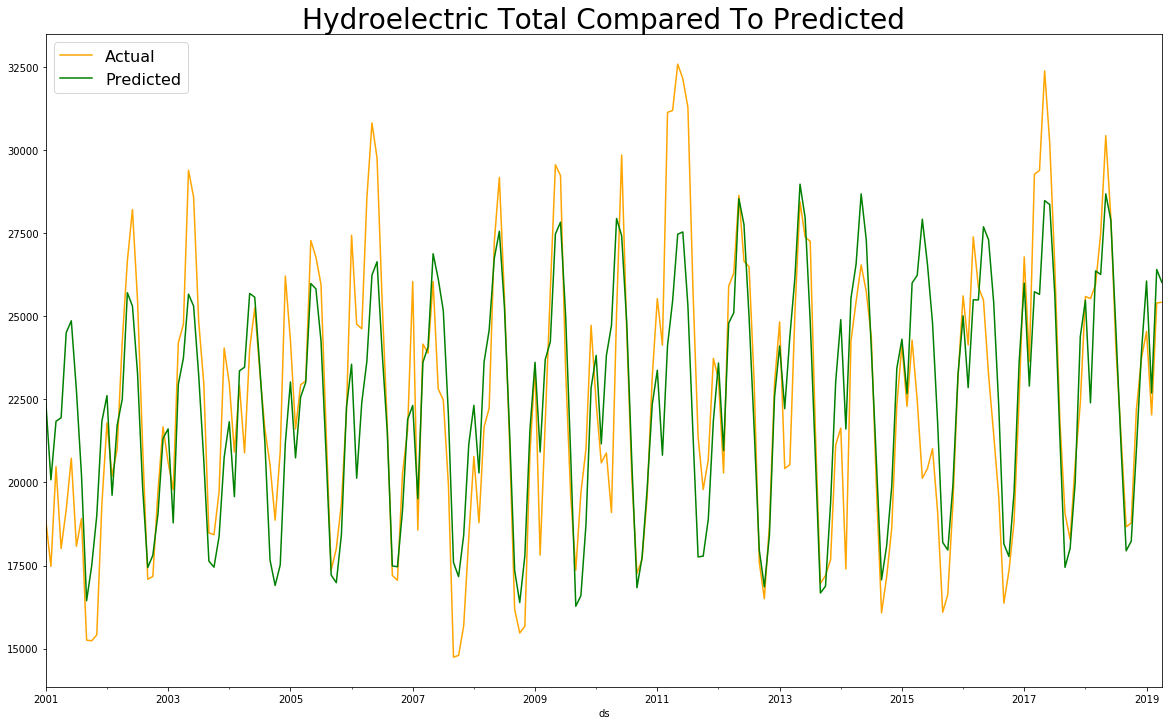

In [358]:
plt.figure(figsize = (20,12))
df_recent['Conventional Hydroelectric Power'].plot(color = 'orange', label = 'Actual')
pred_mid['hydro'][:'2019-04-01'].plot(color = 'green', label = "Predicted")
plt.title("Hydroelectric Total Compared To Predicted", size = 28)
plt.legend(fontsize = 16)

In [359]:
metrics.r2_score(df_recent['Conventional Hydroelectric Power'],pred_mid['hydro'][:'2019-04-01'])

0.6746196510104916

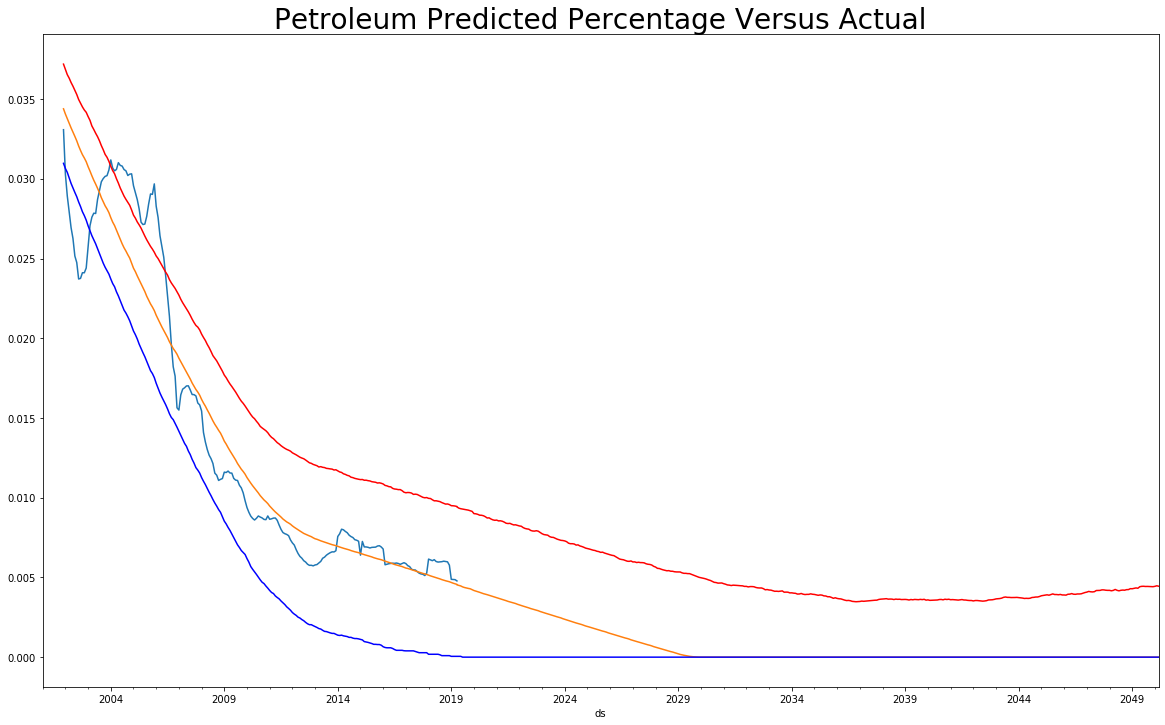

In [360]:
plt.figure(figsize = (20,12))
(df_recent['Petroleum']/df_recent['Total']).rolling(12).mean().plot()
(pred_mid['petroleum'] / pred_mid['total']).rolling(12).mean().plot()
(pred_upper['petroleum'] / pred_upper['total']).rolling(12).mean().plot(color = 'red')
(pred_lower['petroleum'] / pred_lower['total']).rolling(12).mean().plot(color = 'blue')
plt.title("Petroleum Predicted Percentage Versus Actual", size = 28);

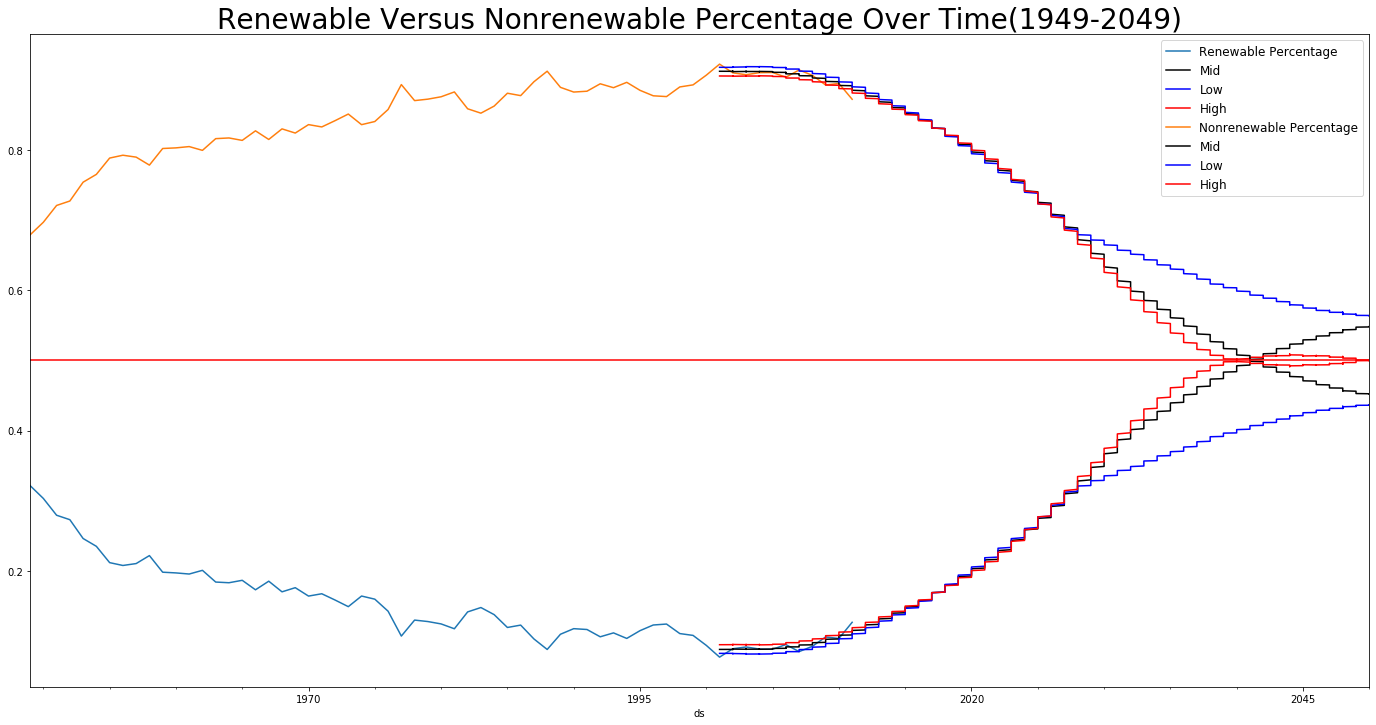

In [361]:
plt.figure(figsize = (24,12))

df_past['Renewable Percentage'].plot()
pred_mid['renewable percent'].rolling(12).mean().plot(color = 'black', label = "Mid")
pred_lower['renewable percent'].rolling(12).mean().plot(color = 'blue', label = 'Low')
pred_upper['renewable percent'].rolling(12).mean().plot(color = 'red', label = 'High')

df_past['Nonrenewable Percentage'].plot()
pred_mid['nonrenewable percent'].rolling(12).mean().plot(color = 'black', label = "Mid")
pred_lower['nonrenewable percent'].rolling(12).mean().plot(color = 'blue', label = 'Low')
pred_upper['nonrenewable percent'].rolling(12).mean().plot(color = 'red', label = 'High')

plt.axhline(0.5, color = 'red')
plt.legend(fontsize = 12)
plt.title('Renewable Versus Nonrenewable Percentage Over Time(1949-2049)', size = 28);


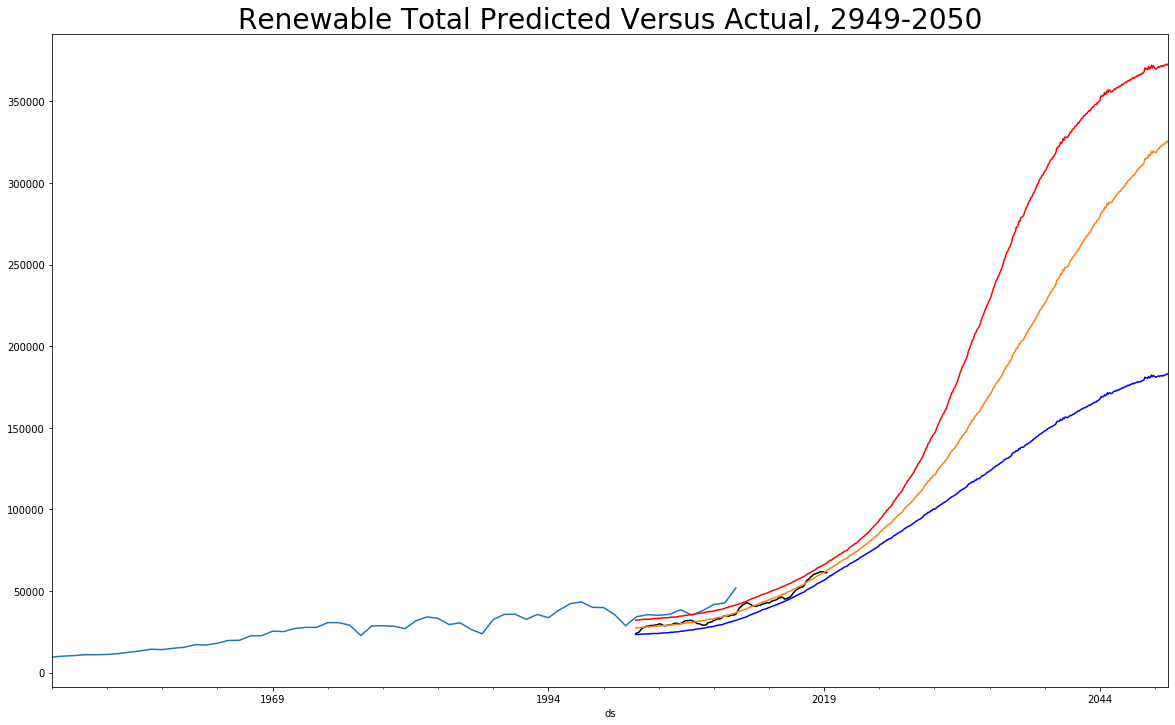

In [362]:
plt.figure(figsize = (20,12))

df_past['Renewable Total'].plot()

(df_recent['Renewable Total']).rolling(12).mean().plot(color = 'black')
(pred_mid['renewables']).rolling(12).mean().plot()
(pred_upper['renewables']).rolling(12).mean().plot(color = 'red')
(pred_lower['renewables']).rolling(12).mean().plot(color = 'blue')

plt.title("Renewable Total Predicted Versus Actual, 2949-2050", size = 28);

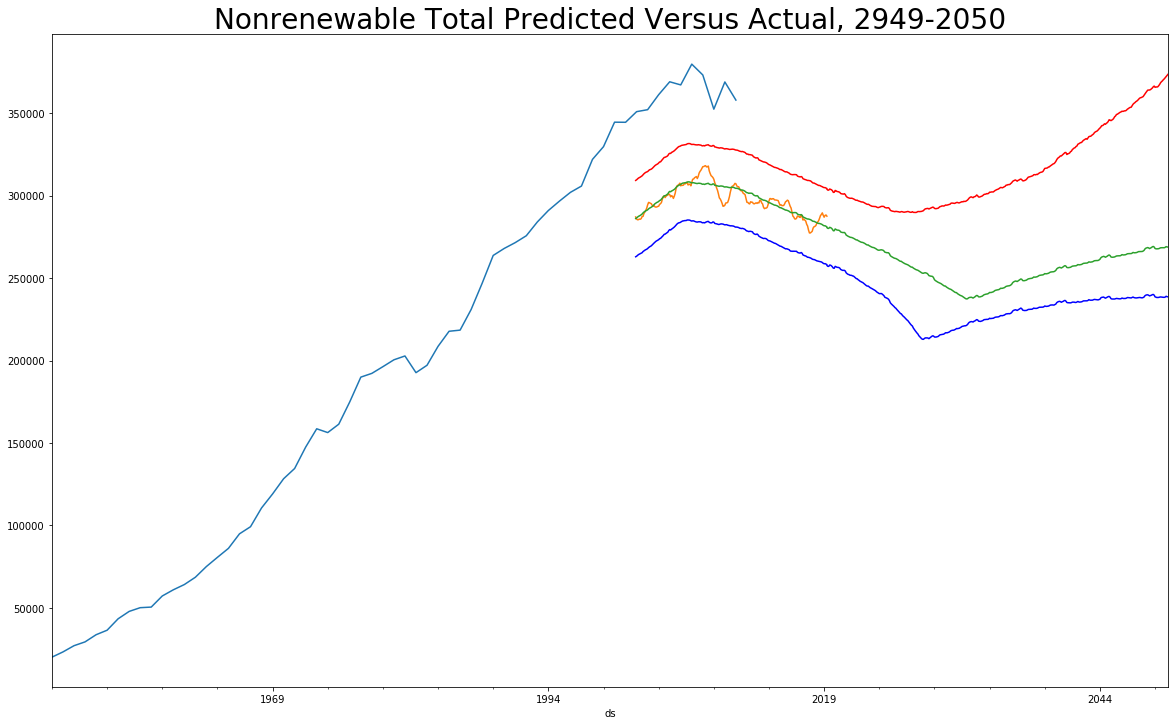

In [363]:
plt.figure(figsize = (20,12))
df_past['Nonrenewable Total'].plot()
(df_recent['Nonrenewable Total']).rolling(12).mean().plot()
(pred_mid['nonrenewables']).rolling(12).mean().plot()
(pred_upper['nonrenewables']).rolling(12).mean().plot(color = 'red')
(pred_lower['nonrenewables']).rolling(12).mean().plot(color = 'blue')
plt.title("Nonrenewable Total Predicted Versus Actual, 2949-2050", size = 28);

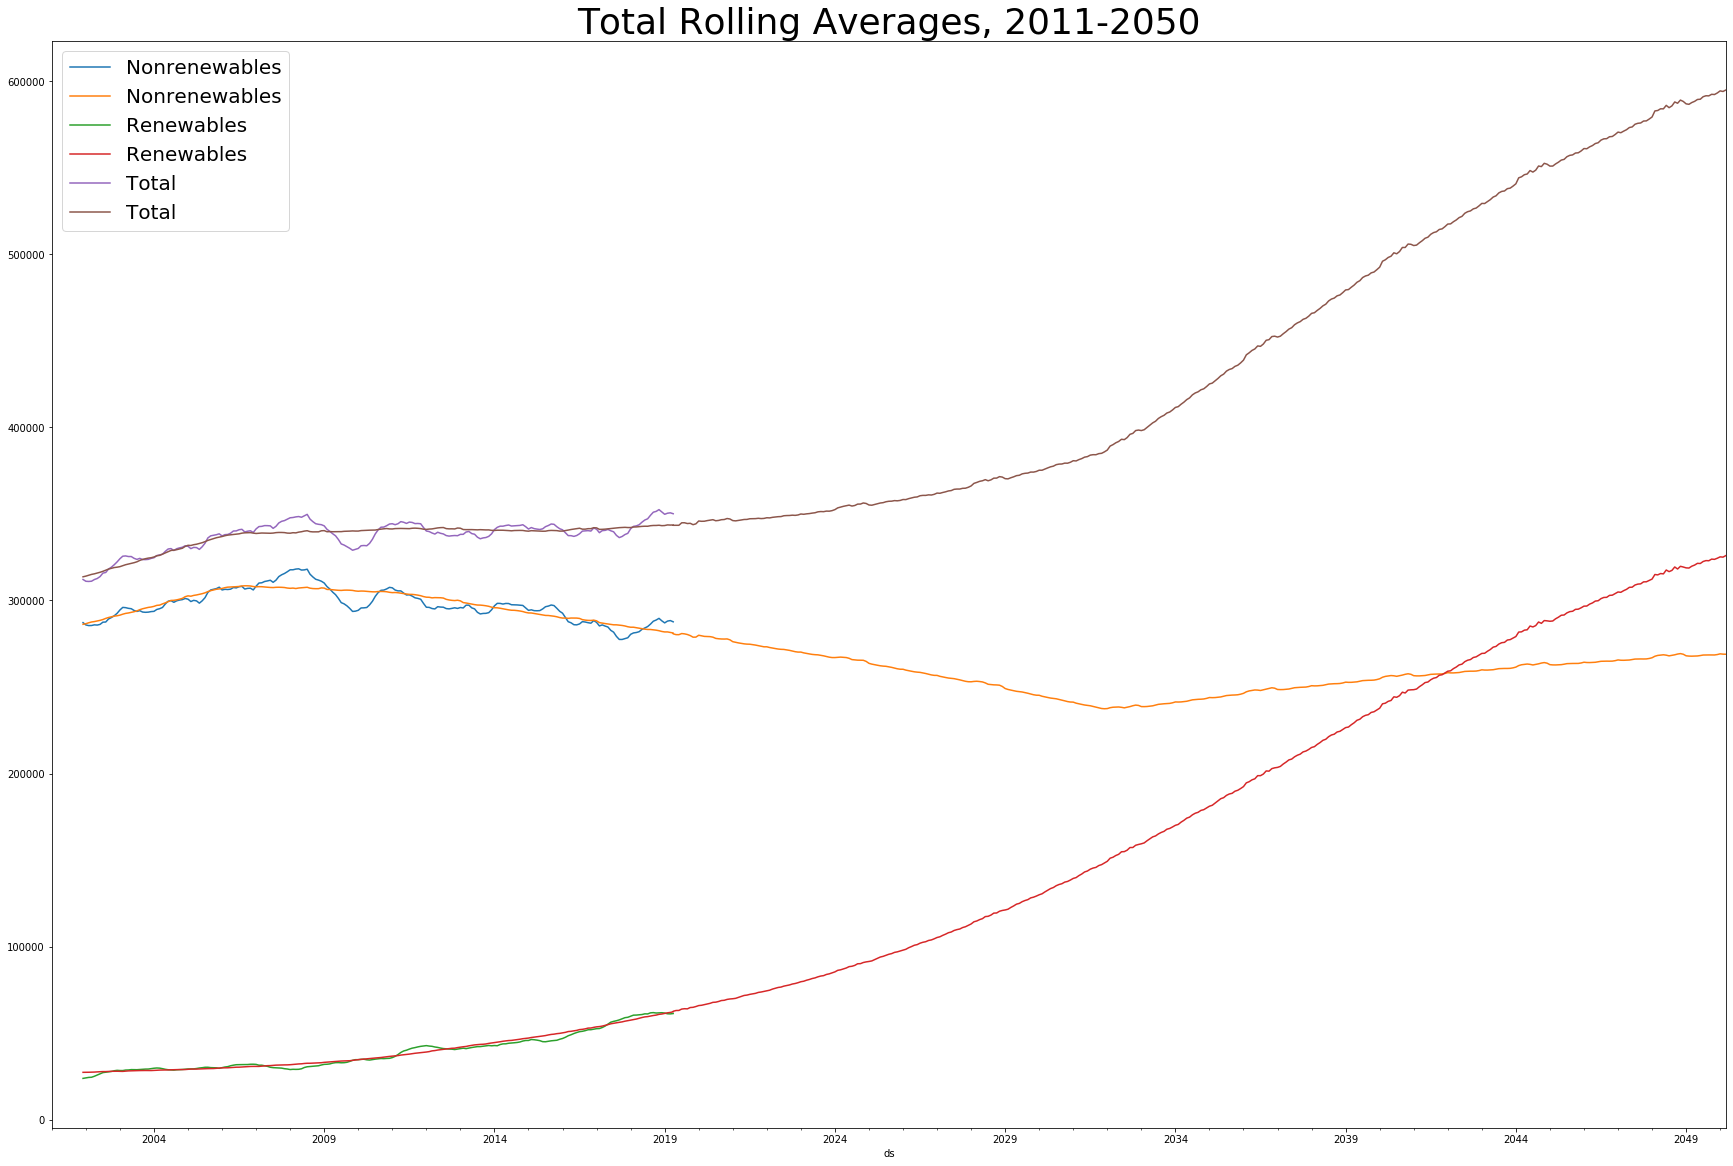

In [364]:
plt.figure(figsize = (30,20))

(df_recent['Nonrenewable Total']).rolling(12).mean().plot(label = "Nonrenewables")
(pred_mid['nonrenewables']).rolling(12).mean().plot(label = "Nonrenewables")

(df_recent['Renewable Total']).rolling(12).mean().plot(label = 'Renewables')
(pred_mid['renewables']).rolling(12).mean().plot(label = "Renewables")

(df_recent['Total']).rolling(12).mean().plot(label = 'Total')
pred_mid['total'].rolling(12).mean().plot(label = 'Total')

plt.legend(fontsize = 20)
plt.title("Total Rolling Averages, 2011-2050", size = 36);

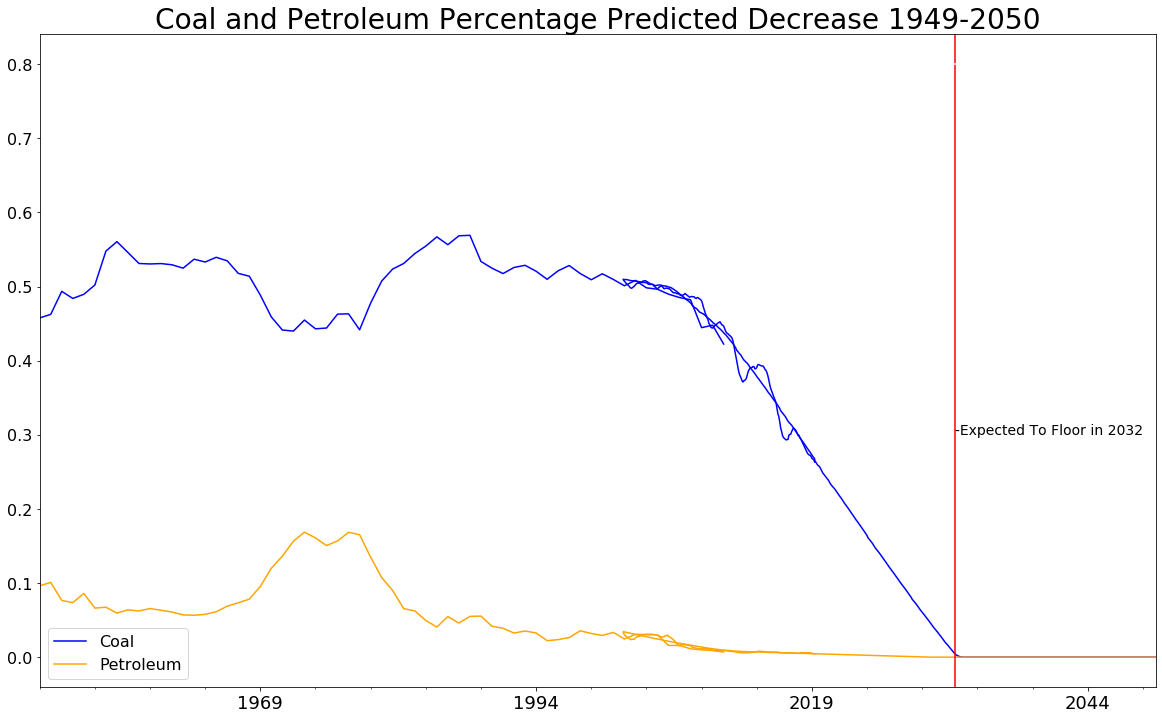

In [365]:
plt.figure(figsize = (20,12))
(df_past['Coal']/df_past['Total']).plot(color = 'blue')
(df_past['Petroleum']/df_past['Total']).plot(color = 'orange')

(df_recent['Coal']/df_recent['Total']).rolling(12).mean().plot(color = 'blue')
(df_recent['Petroleum']/df_recent['Total']).rolling(12).mean().plot(color = 'orange')

(pred_mid['coal']/pred_mid['total']).rolling(12).mean().plot(color = 'blue')
(pred_mid['petroleum']/pred_mid['total']).rolling(12).mean().plot(color = 'orange')

plt.axvline('2032', color = 'red')
plt.legend(['Coal', "Petroleum"], fontsize = 16)
plt.xticks(fontsize = 18)
plt.yticks(fontsize = 16)
plt.axhline(0.8, color = 'white')
plt.xlabel("")
plt.text('2032', 0.3, "-Expected To Floor in 2032", size = 14)
plt.title('Coal and Petroleum Percentage Predicted Decrease 1949-2050', size = 28);

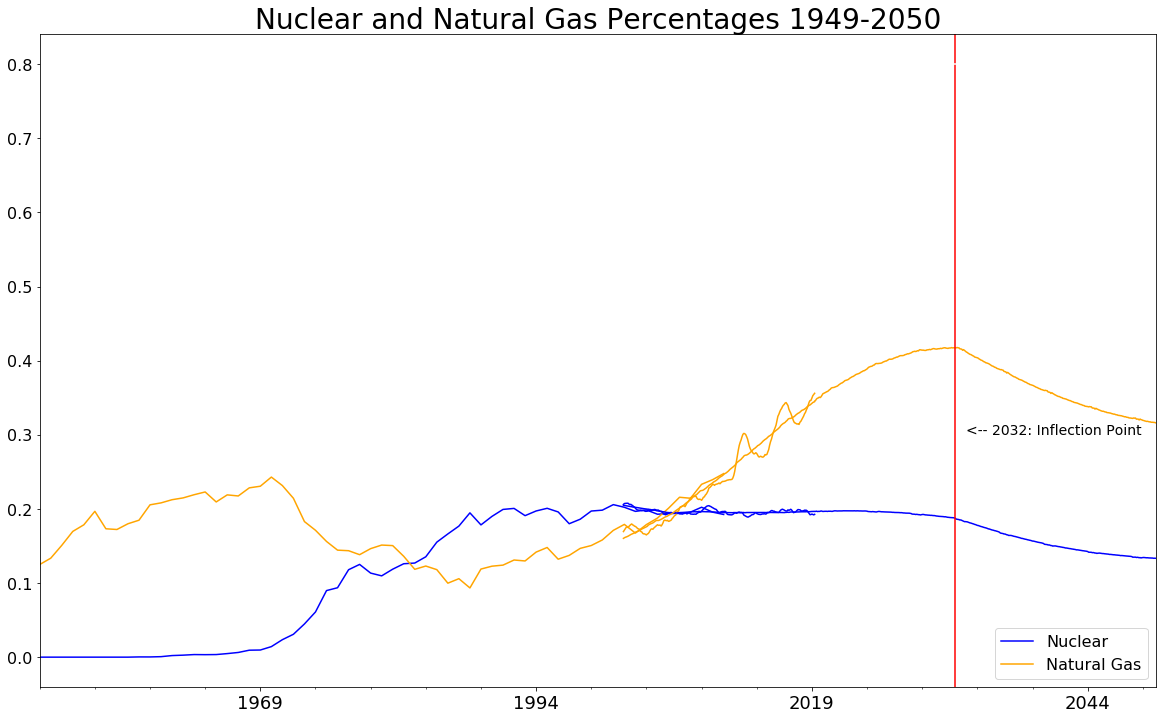

In [366]:
plt.figure(figsize = (20,12))
(df_past['Nuclear']/df_past['Total']).plot(color = 'blue')
(df_past['Natural Gas']/df_past['Total']).plot(color = 'orange')

(df_recent['Nuclear']/df_recent['Total']).rolling(12).mean().plot(color = 'blue')
(df_recent['Natural Gas']/df_recent['Total']).rolling(12).mean().plot(color = 'orange')

(pred_mid['nuclear']/pred_mid['total']).rolling(12).mean().plot(color = 'blue')
(pred_mid['ngas']/pred_mid['total']).rolling(12).mean().plot(color = 'orange')

plt.axvline('2032', color = 'red')
plt.legend(['Nuclear', "Natural Gas"], fontsize = 16)
plt.xticks(fontsize = 18)
plt.xlabel("")
plt.yticks(fontsize = 16)
plt.text('2033', 0.3, "<-- 2032: Inflection Point", size = 14)
plt.axhline(0.8, color = 'white')
plt.title('Nuclear and Natural Gas Percentages 1949-2050', size = 28);

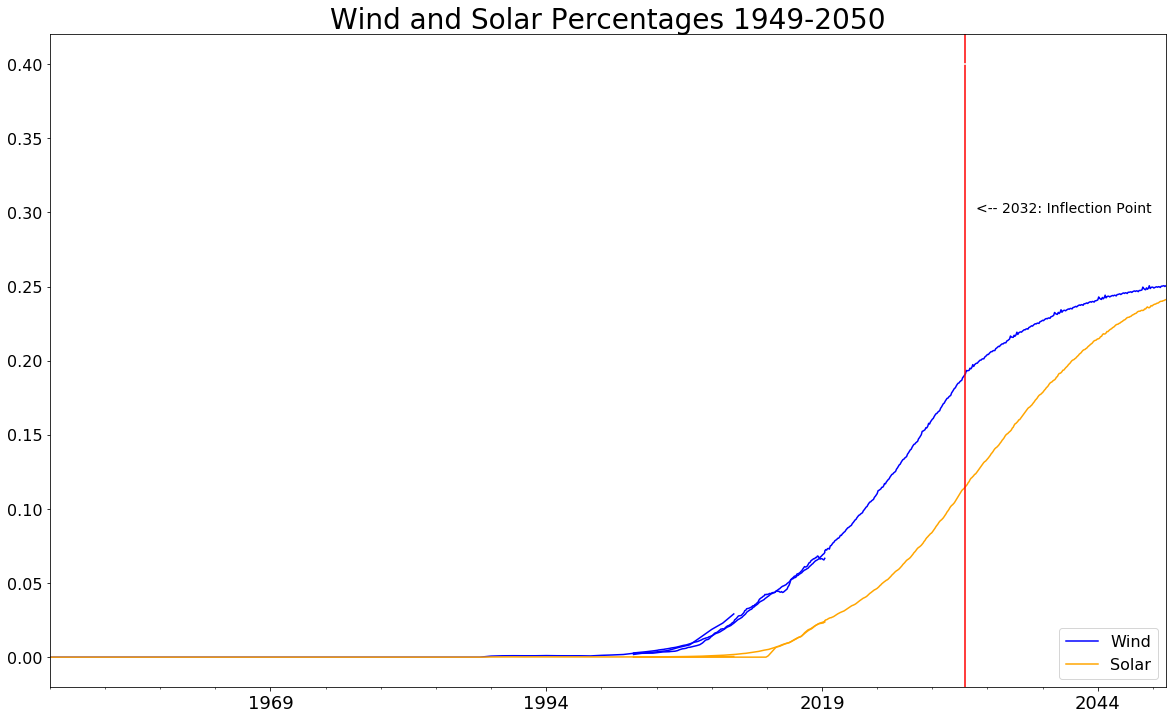

In [372]:
plt.figure(figsize = (20,12))
(df_past['Wind']/df_past['Total']).plot(color = 'blue')
(df_past['Solar/PV']/df_past['Total']).plot(color = 'orange')

(df_recent['Wind']/df_recent['Total']).rolling(12).mean().plot(color = 'blue')
(df_recent['Solar/PV']/df_recent['Total']).rolling(12).mean().plot(color = 'orange')

(pred_mid['wind']/pred_mid['total']).rolling(12).mean().plot(color = 'blue')
(pred_mid['solar']/pred_mid['total']).rolling(12).mean().plot(color = 'orange')

plt.axvline('2032', color = 'red')
plt.legend(['Wind', "Solar"], fontsize = 16)
plt.xticks(fontsize = 18)
plt.xlabel("")
plt.yticks(fontsize = 16)
plt.text('2033', 0.3, "<-- 2032: Inflection Point", size = 14)
plt.axhline(0.4, color = 'white')
plt.title('Wind and Solar Percentages 1949-2050', size = 28);

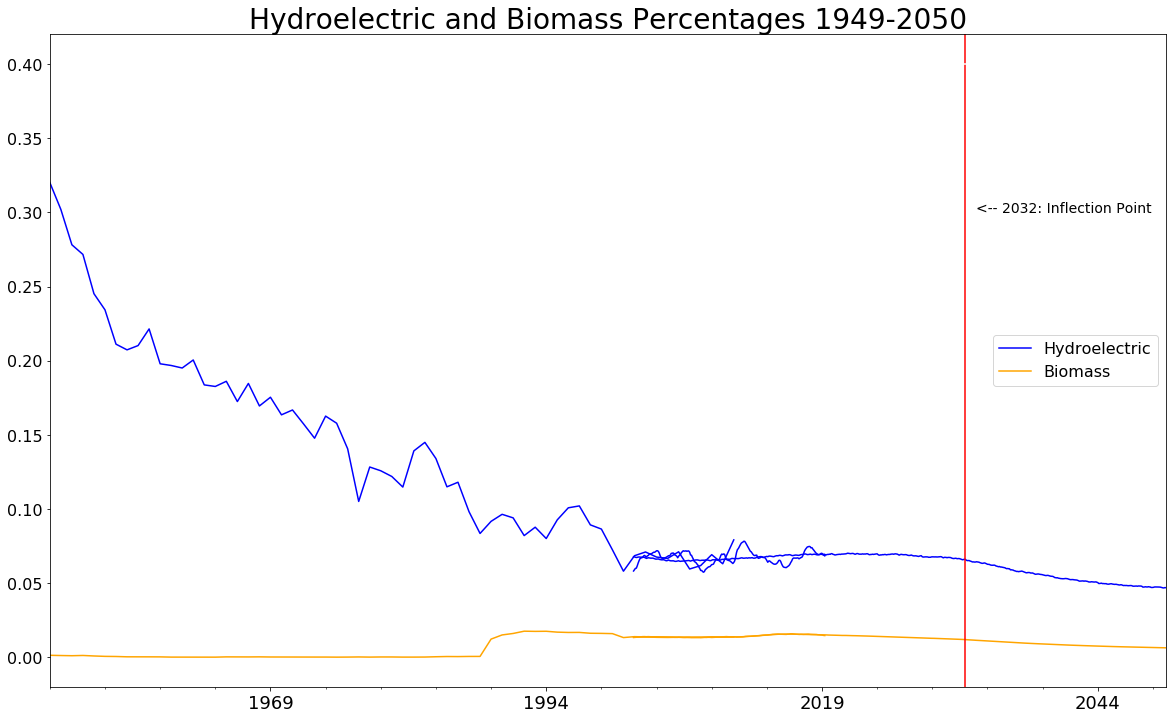

In [374]:
plt.figure(figsize = (20,12))
(df_past['Conventional Hydroelectric Power']/df_past['Total']).plot(color = 'blue')
((df_past['Biomass Waste']+df_past['Biomass Wood'])/df_past['Total']).plot(color = 'orange')

(df_recent['Conventional Hydroelectric Power']/df_recent['Total']).rolling(12).mean().plot(color = 'blue')
(df_recent['Biomass Total']/df_recent['Total']).rolling(12).mean().plot(color = 'orange')

(pred_mid['hydro']/pred_mid['total']).rolling(12).mean().plot(color = 'blue')
(pred_mid['bio']/pred_mid['total']).rolling(12).mean().plot(color = 'orange')

plt.axvline('2032', color = 'red')
plt.legend(['Hydroelectric', "Biomass"], fontsize = 16)
plt.xticks(fontsize = 18)
plt.xlabel("")
plt.yticks(fontsize = 16)
plt.text('2033', 0.3, "<-- 2032: Inflection Point", size = 14)
plt.axhline(0.4, color = 'white')
plt.title('Hydroelectric and Biomass Percentages 1949-2050', size = 28);

In [368]:
pred_lower.to_csv('../data/lower_predictions.csv', index = True)
pred_mid.to_csv('../data/midrange_predictions.csv', index = True)
pred_upper.to_csv('../data/upper_predictions.csv', index = True)